## QQ PLOT : 



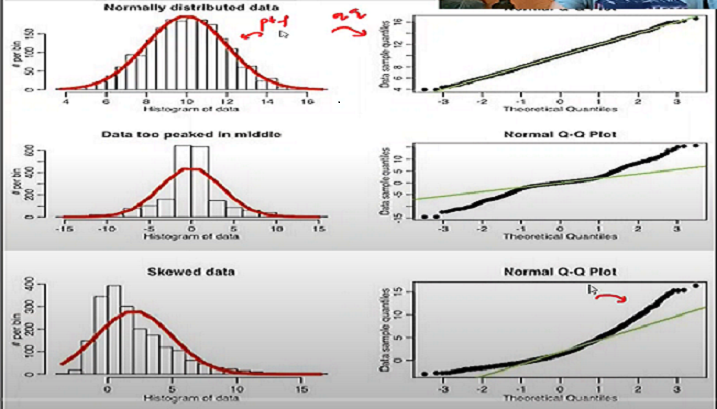

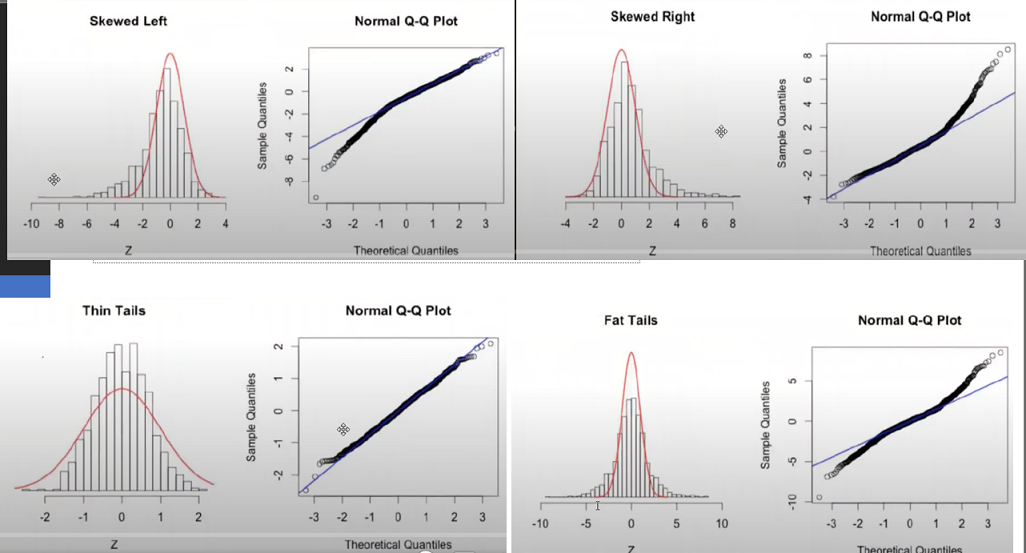

## Feature Transformation

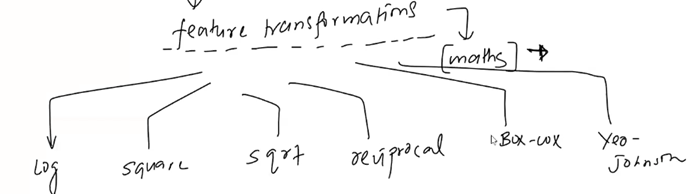

## Why do we need transformations?

__To improve the model performance__ - as these transformations conform to __model
assumptions__ and which in turn amplifies model's predictive power and increases
the quality of the model


1. It can even out the variance - Homoscedasticity


2. To make the feature more normally distributed


3. It can reduce the skew


4. It can linearize the relationship between the feature and target


5. Reduce the impact of outliers

> __NOTE : These Transformation are more useful for Parametric Models such as Linear Models, SVM and less for Tree based models.__

## What are Feature Transformations

- __Power transformers__ typically refer to transformations that modify the distribution of numerical features using __Power laws__. The idea is to increase the symmetry of the distribution of the features. If a features is asymmetric, applying a power transformation will make it more symmetric.<br></br>
    - ___Log Transformation___<br></br>
    - ___Box-Cox Transformation___<br></br>
    - ___Square and Square Root Transformation___<br></br>


- __Function transformers__ encompass a broader range of operations that apply arbitrary functions to features, potentially transforming them into a different space or format<br></br>
    - ___Polynomial Features___<br></br>
    - ___Custom Functions Transformations___<br></br>

### Problems after transformation

1. Interpretation


2. Finding the best transformation is tricky


3. Additional step in the pipeline

### Mathematical transformation  : 

Applying mathematical formulas on columns and transforming them.

___It converts distribution of data into Normal-Distribution___

## 1. LOG Transform

- __By taking log, data tends to be normally distributed.__ Data becomes lineraly distributed (far values come closer).  


- Log compresses higher values into lower values. ie. far values come closer


- Log converts Additive Scale into Multiplicative Scale



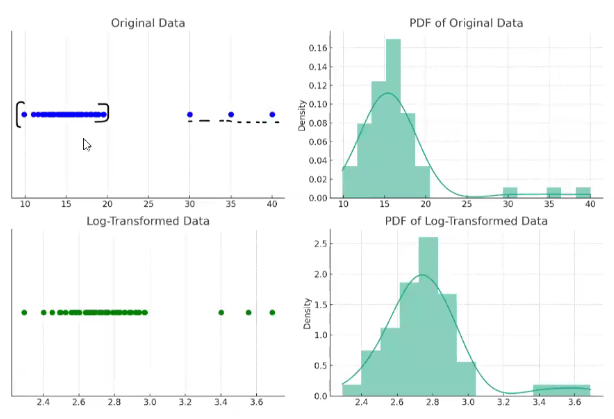

### When to use?


1. __When you have moderate right skewed data (1 to 3 or 4)__


2. When your data contains outliers


3. Reduces Heteroscedasticity

### NOTE : When skewness is between [1-4] we can apply Log Transform

### When not to use?

1. With negative values/zero values


2. __Dont use With normal or uniform distribution__



3. Interpretation

### Algorithms that benefit from Log Transform:

1. Linear Models


2. ANOVA


3. Time series analysis


4. K-Means


5. PCA


6. Gaussian Naïve Bayes


7. Training of Neural Networks

### Prevent heteroscedasticity :  Log Transform applied on Output column (y) which has heteroscedasticity

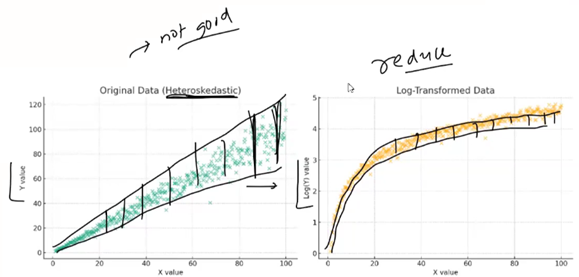

### Log Transform code : 

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('titanic_toy.csv',usecols=['Age','Fare','Survived'])
df.head()

Age     Fare  Survived
0  22.0   7.2500         0
1  38.0  71.2833         1
2  26.0   7.9250         1
3  35.0  53.1000         1
4  35.0   8.0500         0

In [3]:
df.shape

(891, 3)

In [4]:
df.isnull().sum()

Age         177
Fare         45
Survived      0
dtype: int64

#### Filling missing value : 

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [6]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [7]:
df.head()

Age     Fare  Survived
0  22.0   7.2500         0
1  38.0  71.2833         1
2  26.0   7.9250         1
3  35.0  53.1000         1
4  35.0   8.0500         0

In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.head()

Age     Fare
331  45.5  28.5000
733  23.0  13.0000
382  32.0   7.9250
704  26.0   7.8542
813   6.0  31.2750

##### PDF and QQ plotting of Age and Fare column :

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


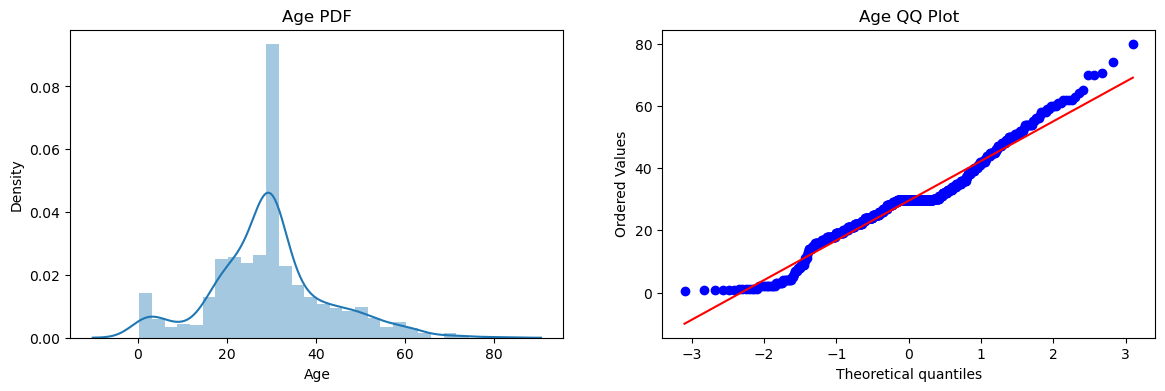

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


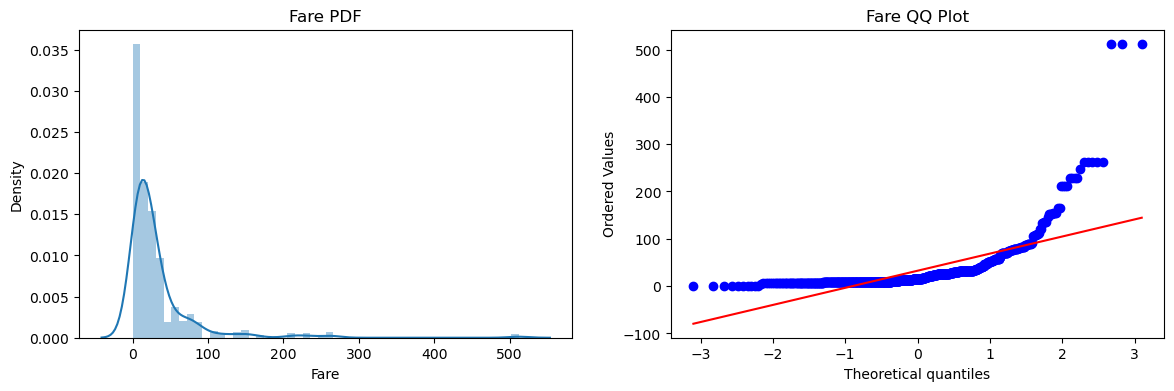

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

#### model running without any transformation : 

In [13]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [14]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR without transformation",accuracy_score(y_test,y_pred))
print("Accuracy DT without transformation",accuracy_score(y_test,y_pred1))

Accuracy LR without transformation 0.6480446927374302
Accuracy DT without transformation 0.659217877094972


### Now applying Log Transformation :

In [15]:
trf = FunctionTransformer(func=np.log1p)

#### difference in np.log and np.log1p :

- np.log converts everything in log form but problem occurs when value is 0.



- np.log1p adds +1 to everything then does a log transformation

In [16]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [17]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR after Log Transformation",accuracy_score(y_test,y_pred))
print("Accuracy DT after Log Transformation",accuracy_score(y_test,y_pred1))

Accuracy LR after Log Transformation 0.6871508379888268
Accuracy DT after Log Transformation 0.6815642458100558


#### checking cross val score : 

In [18]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("cross val score of LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("cross val score of DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

cross val score of LR 0.678027465667915
cross val score of DT 0.6555056179775282


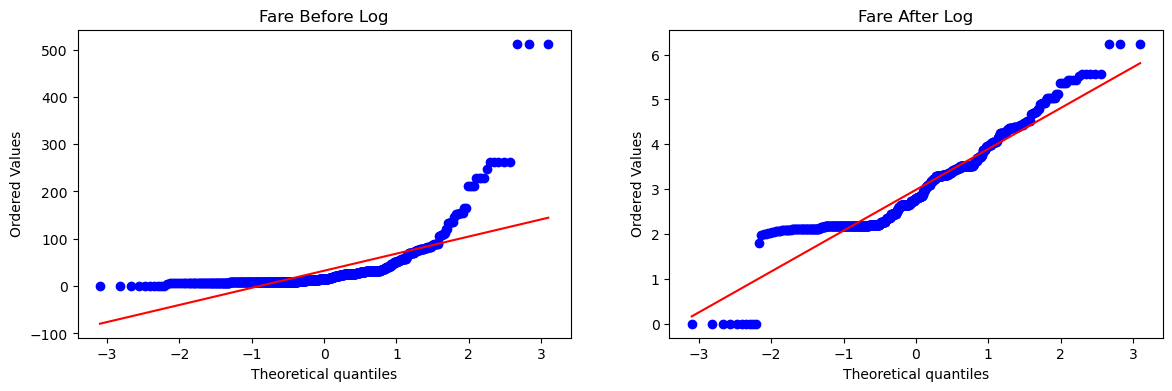

In [19]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

##### Age was already Normally distributed, so after applying Log Transform It became worse : 

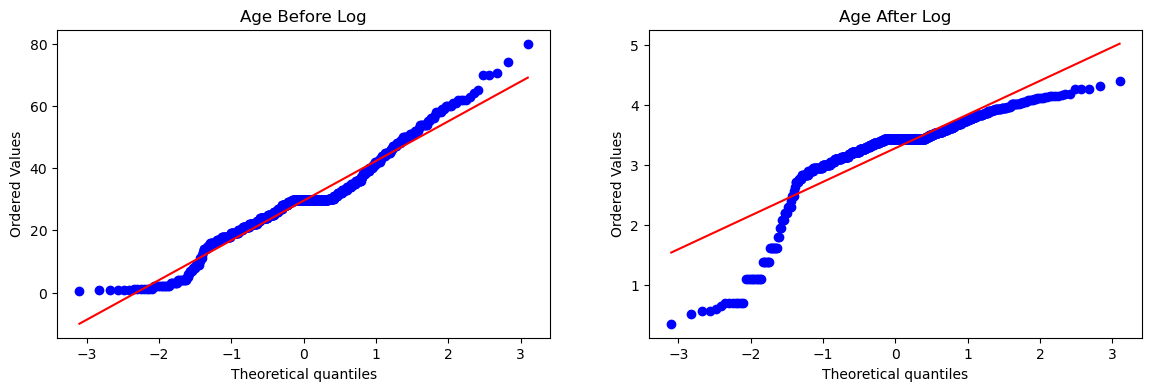

In [20]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

#### Now appling Log transform only on Fare column and not on Age and creating a model : 

In [21]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [22]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6759776536312849
Accuracy DT 0.6815642458100558


##### cross val score of new model : 

In [23]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6678901373283396
DT 0.6476779026217229


In [24]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

In [25]:
apply_transform(np.sin)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1209, in fit
    check_classification_targets(y)
  File "C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\multiclass.py", line 221, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


## 2. Square Root Transformation $\Big(\sqrt x\Big)$

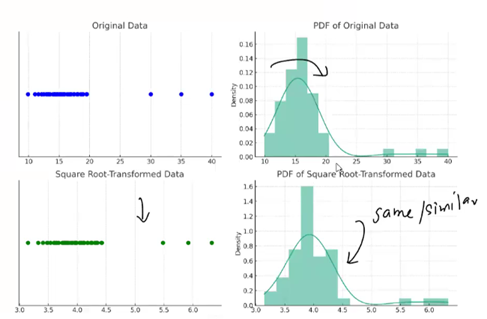

- Very similar to Log Transform but cannot squish large values of x too much.


- Log is too harsh to large values of x



- Square root Transform works well on __Mild Right Skewed data [0-1]__

### Log vs Square Root transform Graph : 

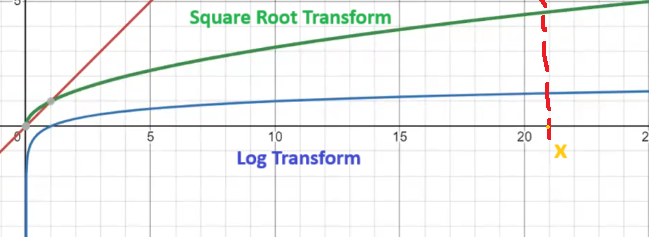

## 3. Square Transform $(x^2)$

- Opposite to Square root Transform.


- __Used on Mild Left Skewed Data [-1 to 0]__


- Used on Non-Linear Realtionship __(parabolic) to make it Linear__

##### Effect of Square tranform on Left Skewed Data : 

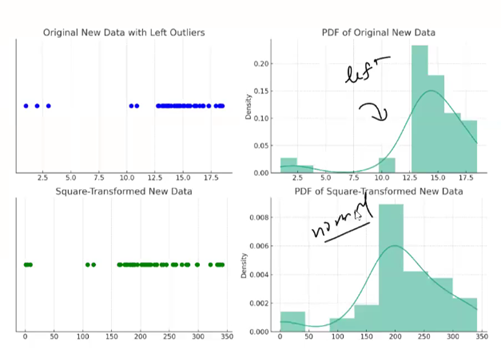

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate 200 random X values between 0 and 10
X = np.random.uniform(0, 10, 200)

# Calculate Y using a quadratic relationship and add some noise
Y = -X**2 + 10*X + np.random.normal(0, 5, 200)

# Convert X and Y into a DataFrame for easier manipulation
df = pd.DataFrame({'X': X, 'Y': Y})

df.head()


In [ ]:
df['X_squared'] = df['X']**2

df.head()

In [ ]:
df_sorted = df.sort_values(by='X')

plt.scatter(df_sorted['X'], df_sorted['Y'], color='blue', label='Actual Data', alpha=0.6)

In [ ]:
plt.scatter(df_sorted['X_squared'], df_sorted['Y'], color='blue', label='Actual Data', alpha=0.6)

#### Plotting $x^2$ on Non-Linear data : 

In [ ]:
# Linear model using X
linear_model = LinearRegression()
linear_model.fit(df[['X']], df['Y'])
df['Linear_Prediction'] = linear_model.predict(df[['X']])

# Linear model using X^2
df['X_squared'] = df['X']**2
squared_model = LinearRegression()
squared_model.fit(df[['X', 'X_squared']], df['Y'])
df['Squared_Prediction'] = squared_model.predict(df[['X', 'X_squared']])

# Sort the dataframe by X values for better plotting
df_sorted = df.sort_values(by='X')

# Plot the data and the models with sorted values
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['X'], df_sorted['Y'], color='blue', label='Actual Data', alpha=0.6)
plt.plot(df_sorted['X'], df_sorted['Linear_Prediction'], color='red', label='Linear Prediction')
plt.plot(df_sorted['X'], df_sorted['Squared_Prediction'], color='green', label='Squared Prediction')
plt.title('Comparison of Linear and Squared Models (Corrected)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## 4. Reciprocal Transform $(\frac{1}{x})$

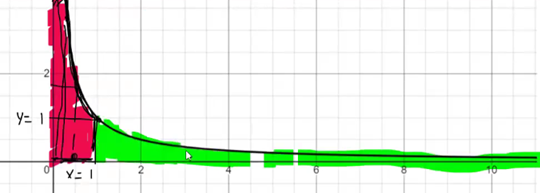

- Bigger values convert into smaller values and vice-versa.


- If data is Left skewed and Outliers are present between 0 and 1 then after applying Reciprocal it become Very Large values and becomes Right skewed and Vice versa.


- __Good for value of x > 1 and Strong Right Skewed data [skewness > 4]__


-  __Good when Input and Ouput columns have Inverse relationship__. It makes it linear.

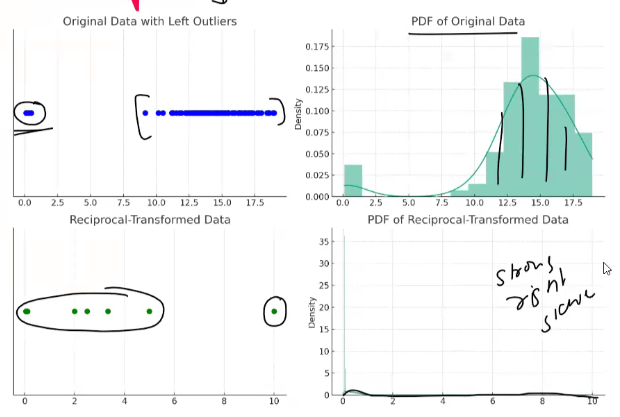

## Applying Transformations on dataset : 

In [26]:
import numpy as np
import pandas as pd

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [28]:
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [29]:
df.skew()

crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64

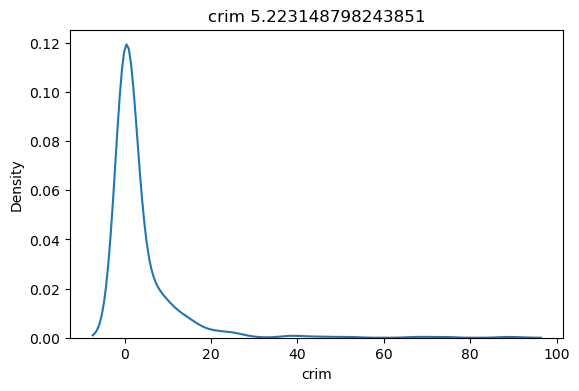

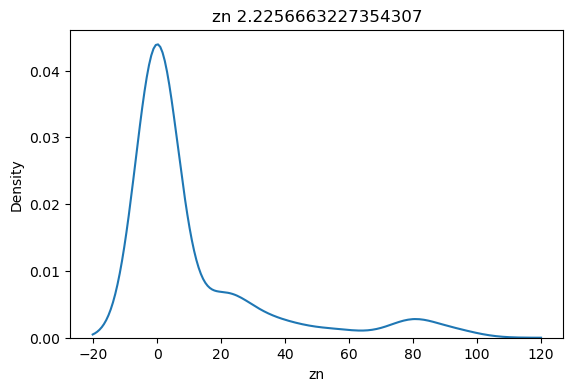

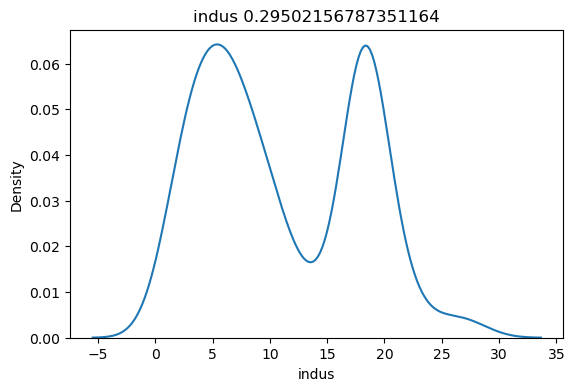

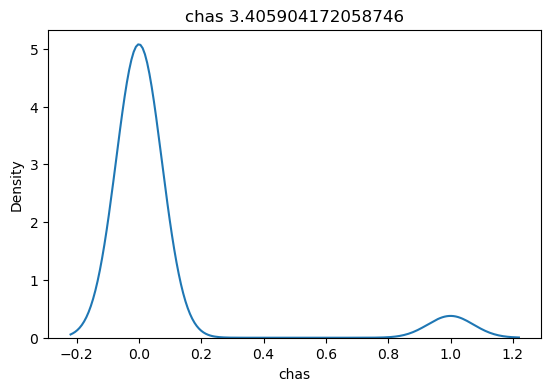

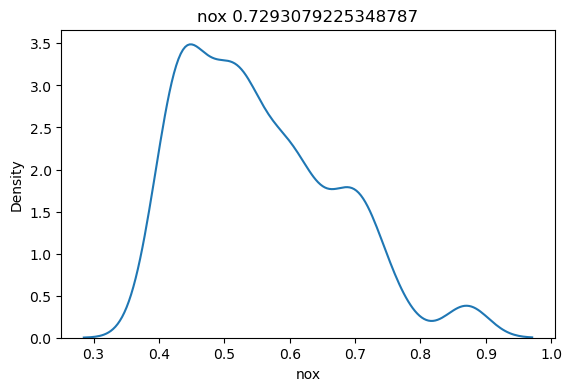

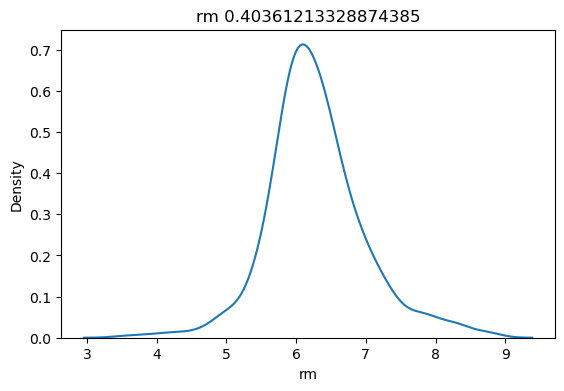

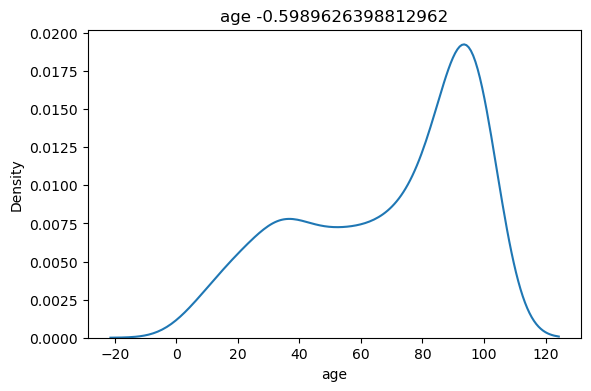

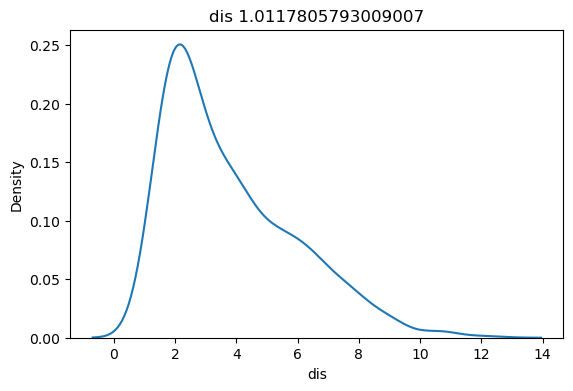

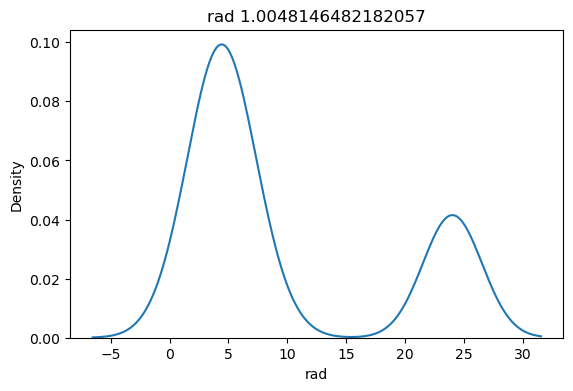

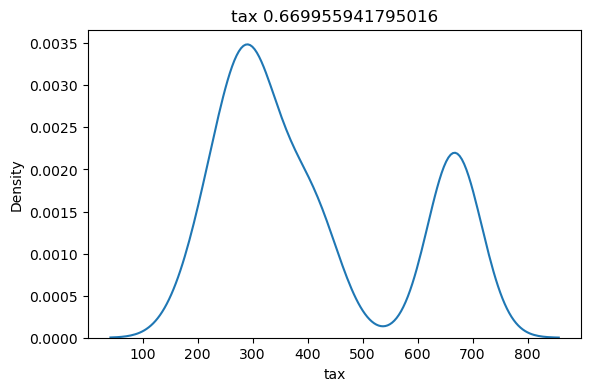

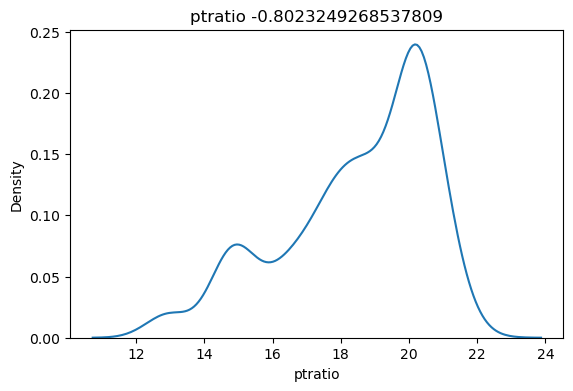

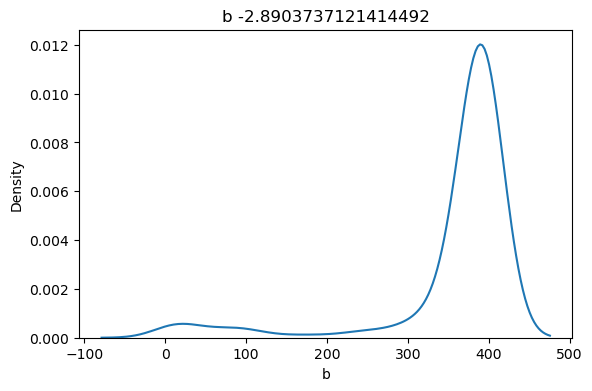

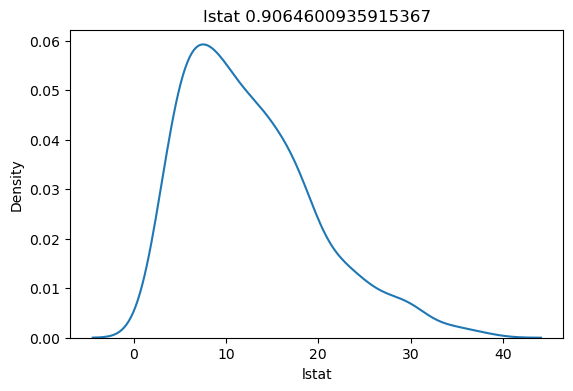

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distplots without any transformation

for col in df.columns[0:-1]:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(df[col])
    txt = col + " " + str(df.skew()[col])
    plt.title(txt)
    plt.show()

### Applying Log Transform on zn column

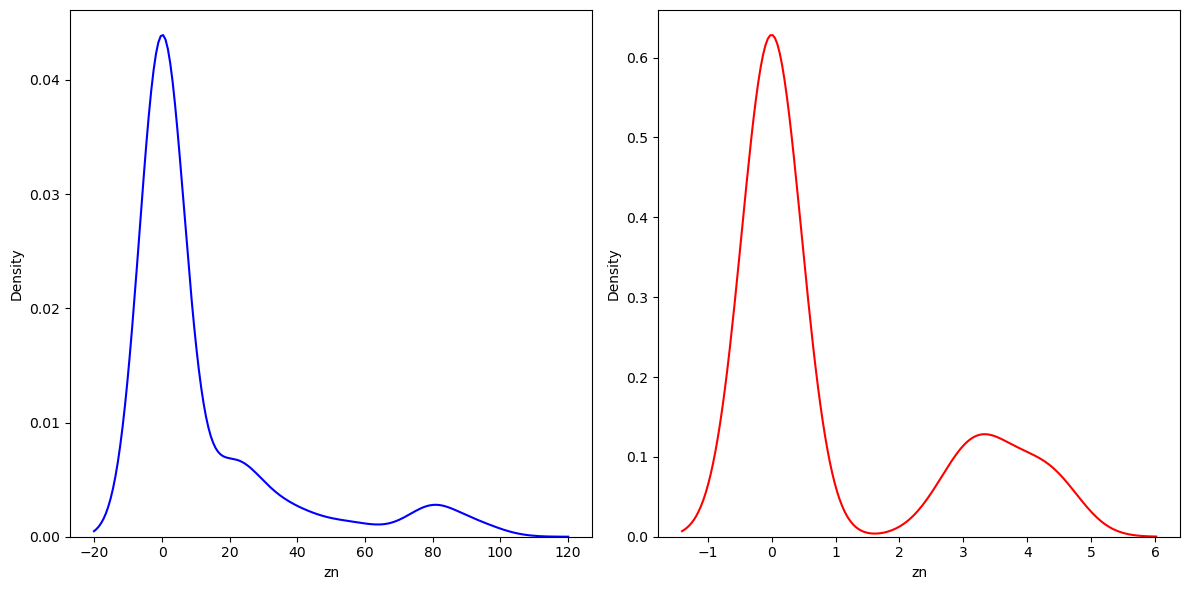

skew before log transform 2.219063057148425
skew after log transform 1.1899105701640726


In [31]:
# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['zn'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.log1p(df['zn']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before log transform', skew(df['zn']))
print('skew after log transform', skew(np.log1p(df['zn'])))

### Applying Log Transform on chas column

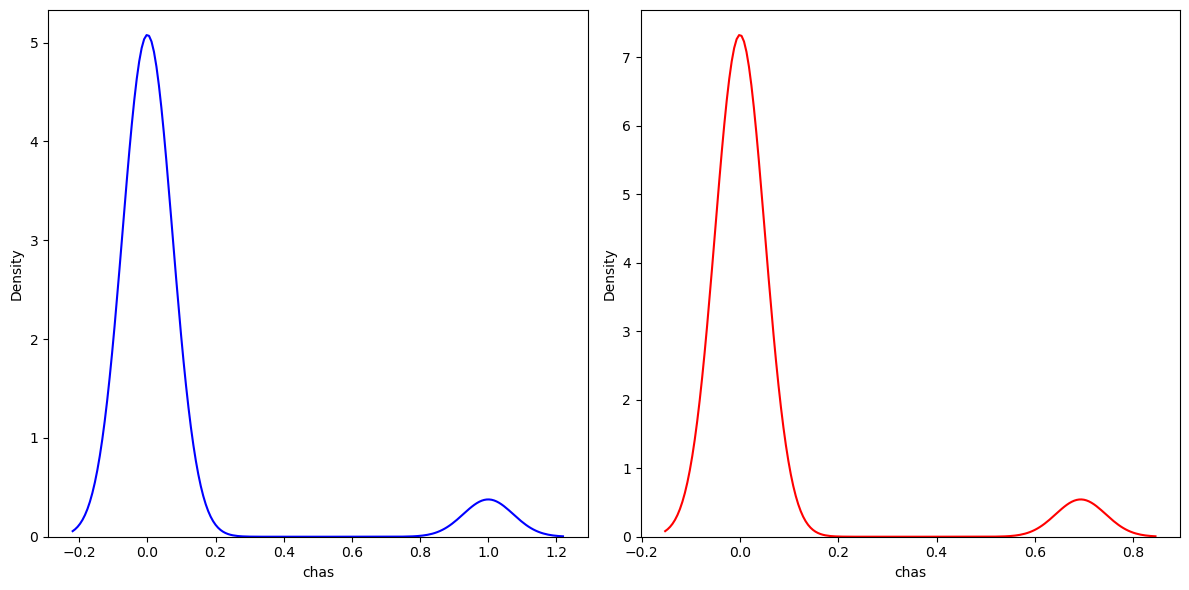

skew before reciprocal transform 3.395799292642519
skew after reciprocal transform 3.3957992926425202


In [32]:
# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['chas'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.log1p(df['chas']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before reciprocal transform', skew(df['chas']))
print('skew after reciprocal transform', skew(np.log1p(df['chas'])))

### Applying Log Transform on dis column

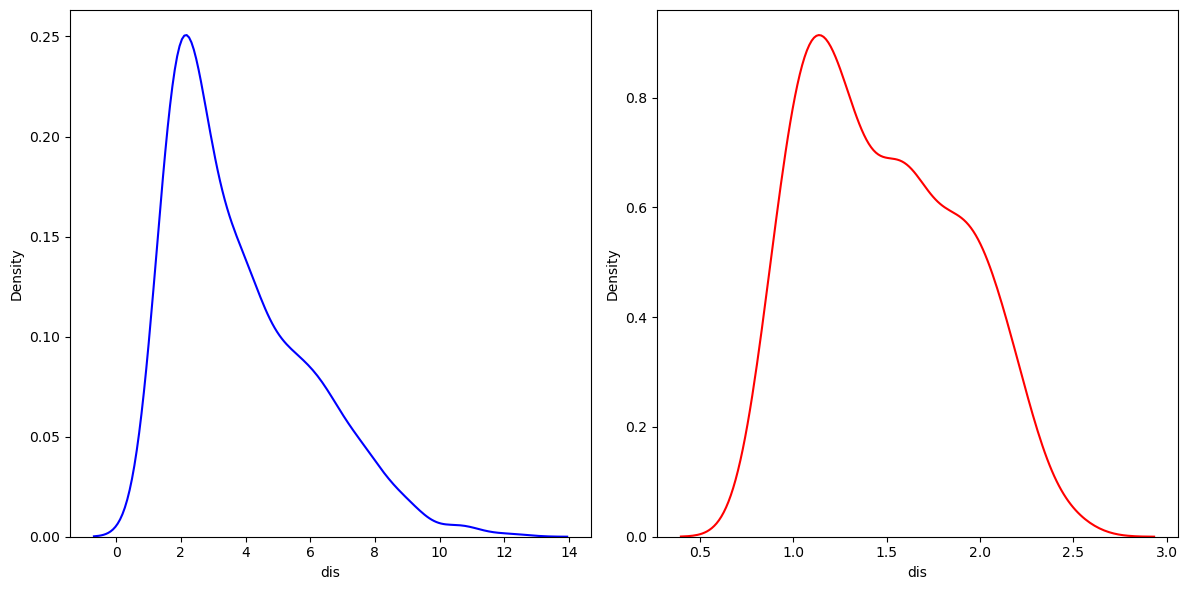

skew before log transform 1.0087787565152246
skew after log transform 0.3305777426343001


In [33]:
# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['dis'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.log1p(df['dis']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before log transform', skew(df['dis']))
print('skew after log transform', skew(np.log1p(df['dis'])))

### Applying Log Transform on rad column

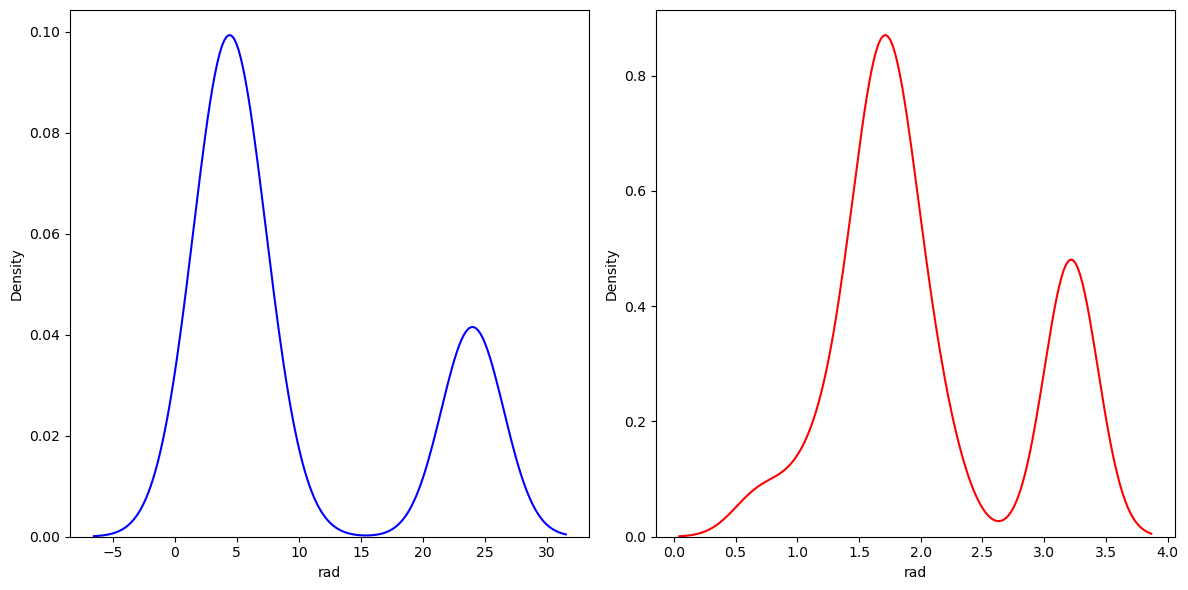

skew before log transform 1.0018334924536951
skew after log transform 0.5311793311965491


In [34]:
# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['rad'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.log1p(df['rad']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before log transform', skew(df['rad']))
print('skew after log transform', skew(np.log1p(df['rad'])))

### Applying Square root Transform on indus column

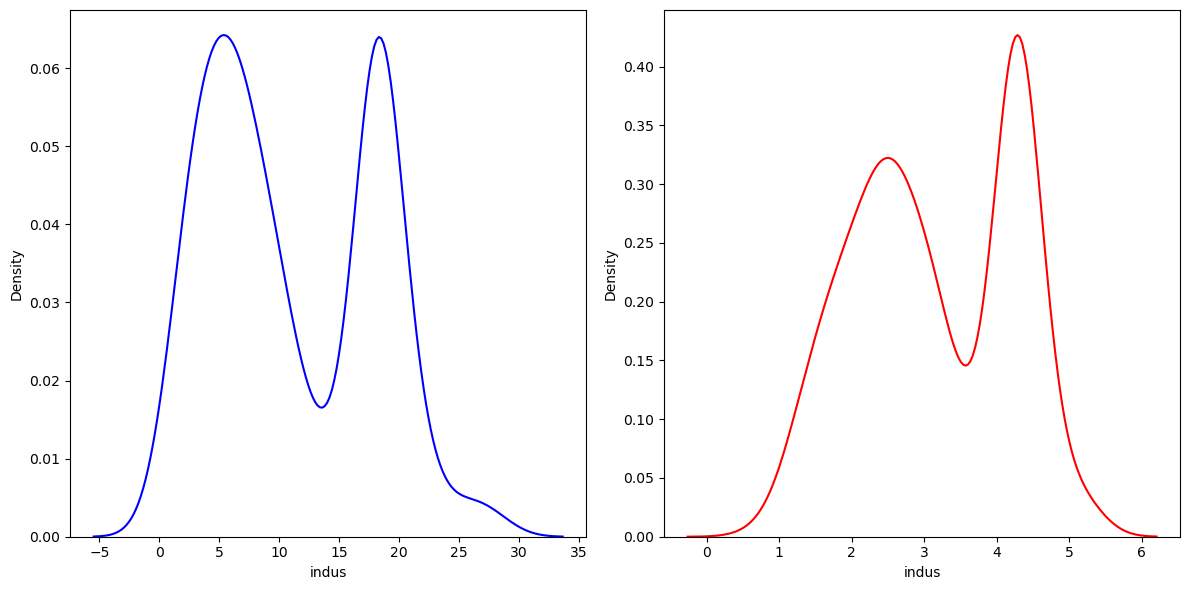

skew before sqrt transform 0.29414627684418543
skew after sqrt transform -0.07239396333108224


In [35]:
# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['indus'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.sqrt(df['indus']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before sqrt transform', skew(df['indus']))
print('skew after sqrt transform', skew(np.sqrt(df['indus'])))

### Applying Square root Transform on nox column

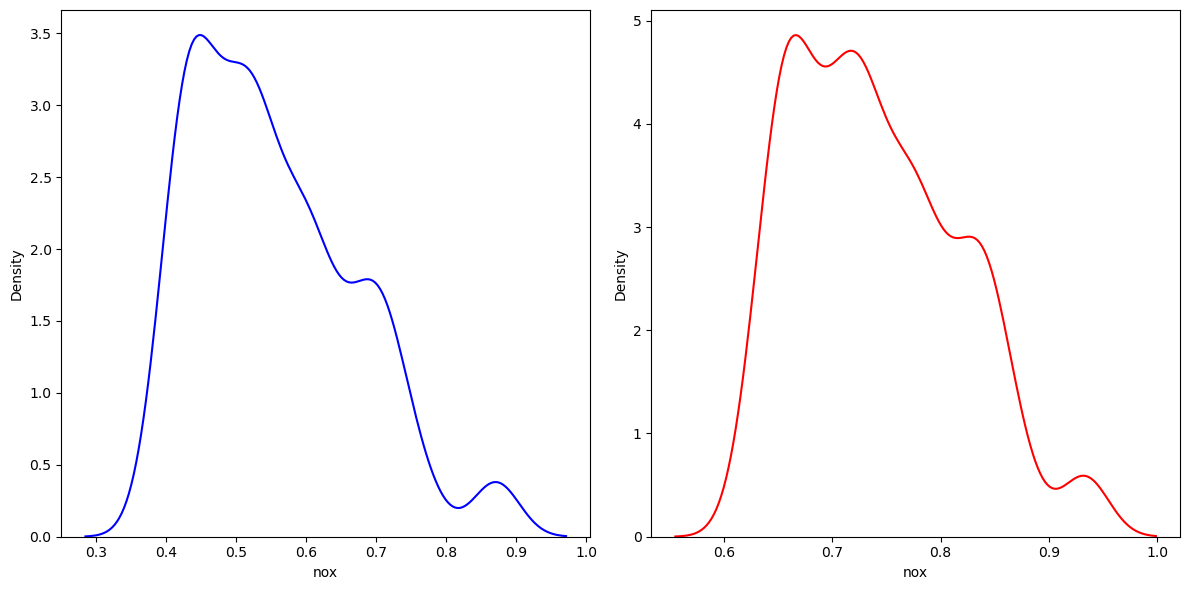

skew before sqrt transform 0.7271441597740319
skew after sqrt transform 0.5351964490014817


In [36]:
# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['nox'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.sqrt(df['nox']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before sqrt transform', skew(df['nox']))
print('skew after sqrt transform', skew(np.sqrt(df['nox'])))

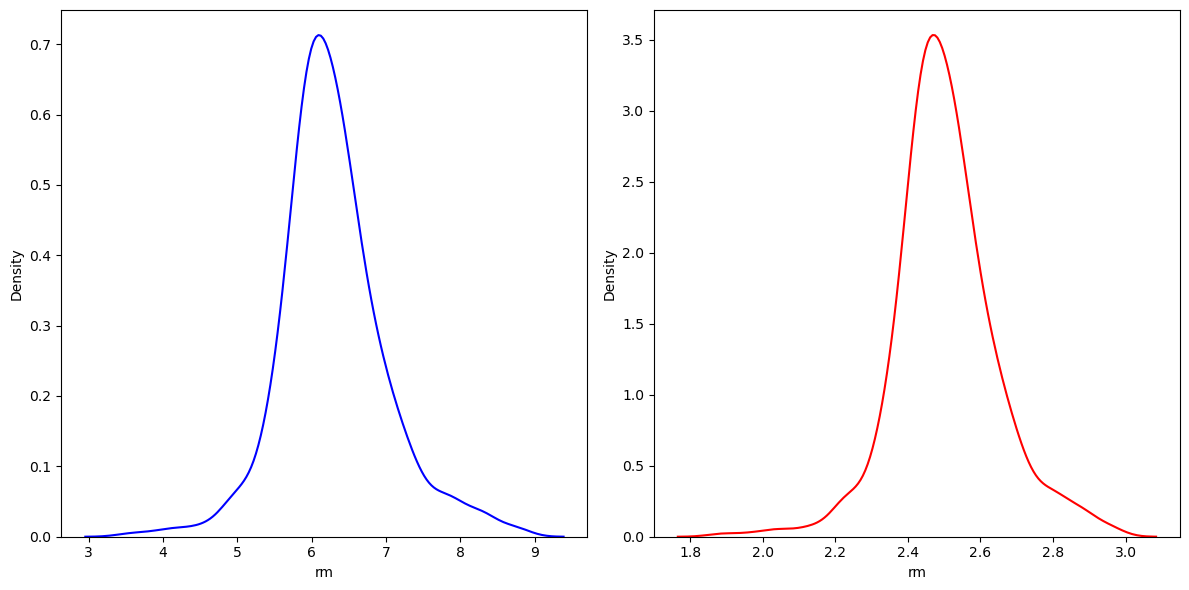

skew before sqrt transform 0.40241466802496245
skew after sqrt transform 0.07249861410468098


In [37]:
# sqrt on rm

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['rm'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.sqrt(df['rm']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before sqrt transform', skew(df['rm']))
print('skew after sqrt transform', skew(np.sqrt(df['rm'])))

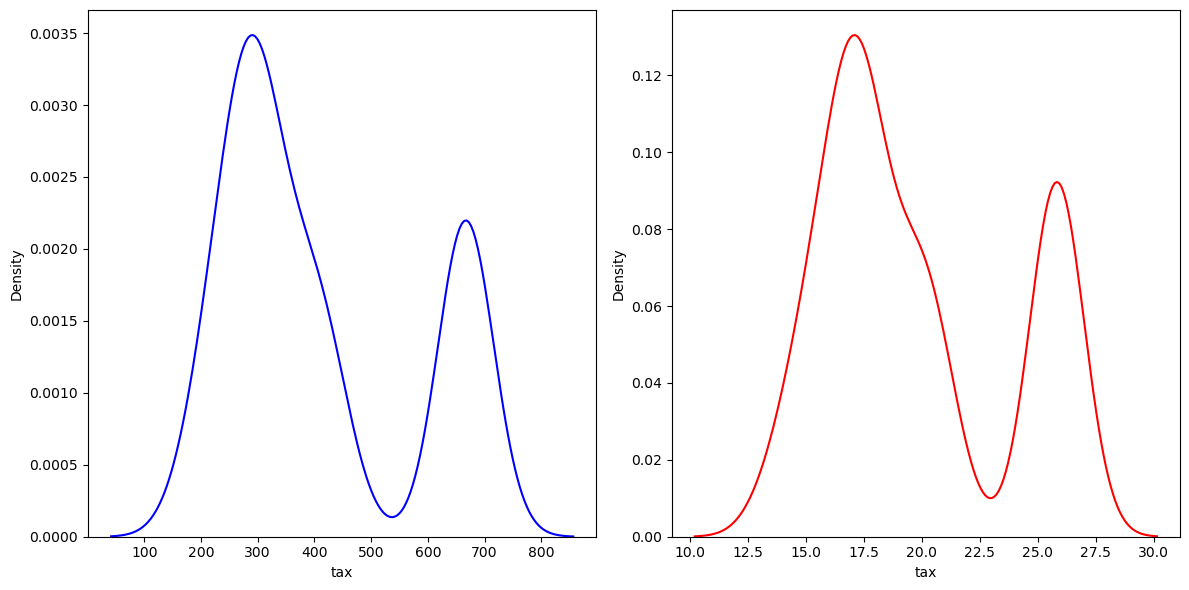

skew before sqrt transform 0.6679682687237768
skew after sqrt transform 0.5202453627239406


In [38]:
# sqrt on tax

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['tax'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.sqrt(df['tax']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before sqrt transform', skew(df['tax']))
print('skew after sqrt transform', skew(np.sqrt(df['tax'])))

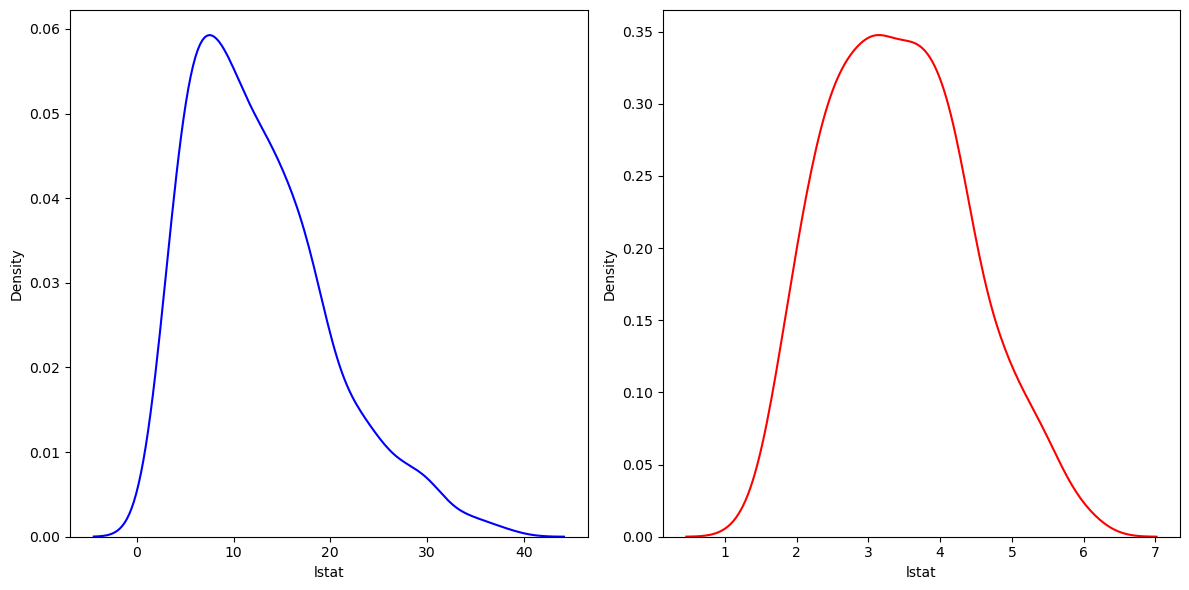

skew before sqrt transform 0.9037707431346133
skew after sqrt transform 0.30647851994358943


In [39]:
# sqrt on lstat

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['lstat'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.sqrt(df['lstat']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before sqrt transform', skew(df['lstat']))
print('skew after sqrt transform', skew(np.sqrt(df['lstat'])))

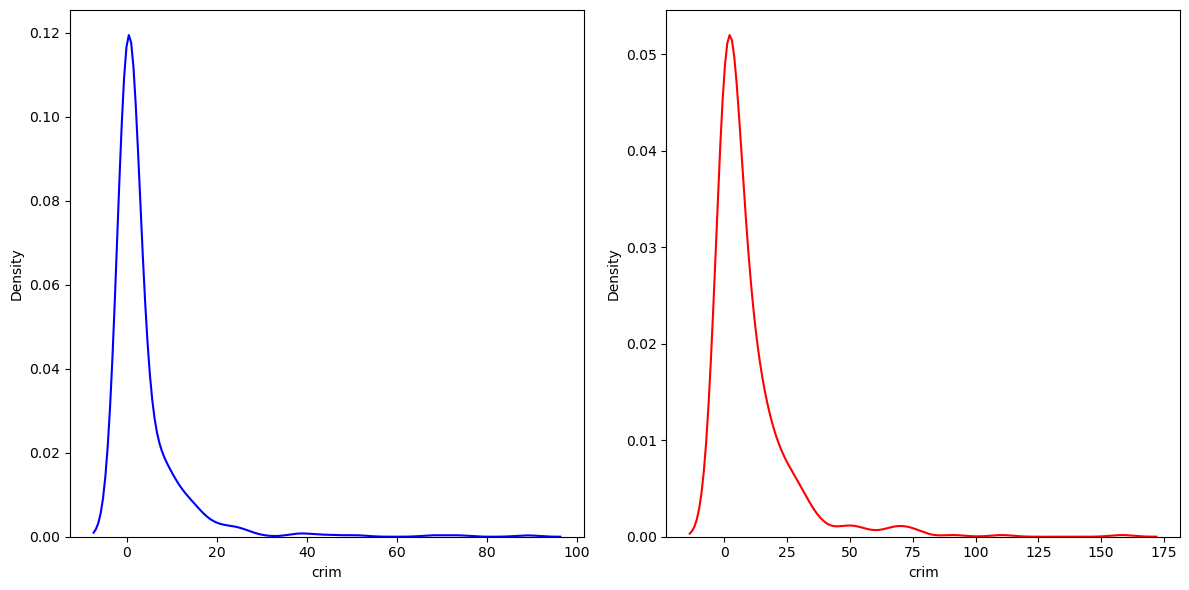

skew before reciprocal transform 5.207652387859715
skew after reciprocal transform 3.733474573321791


In [40]:
# reciprocal on crim

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['crim'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.reciprocal(df['crim']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before reciprocal transform', skew(df['crim']))
print('skew after reciprocal transform', skew(np.reciprocal(df['crim'])))

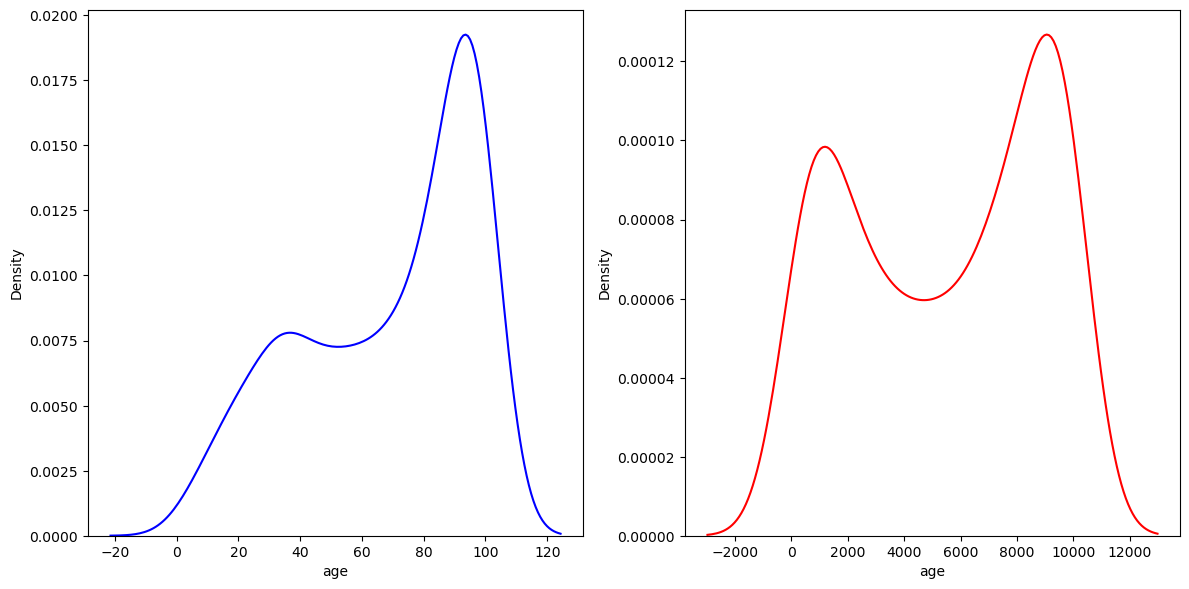

skew before reciprocal transform -0.5971855948016143
skew after reciprocal transform -0.18263633415807376


In [41]:
# square on age

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['age'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.square(df['age']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before reciprocal transform', skew(df['age']))
print('skew after reciprocal transform', skew(np.square(df['age'])))

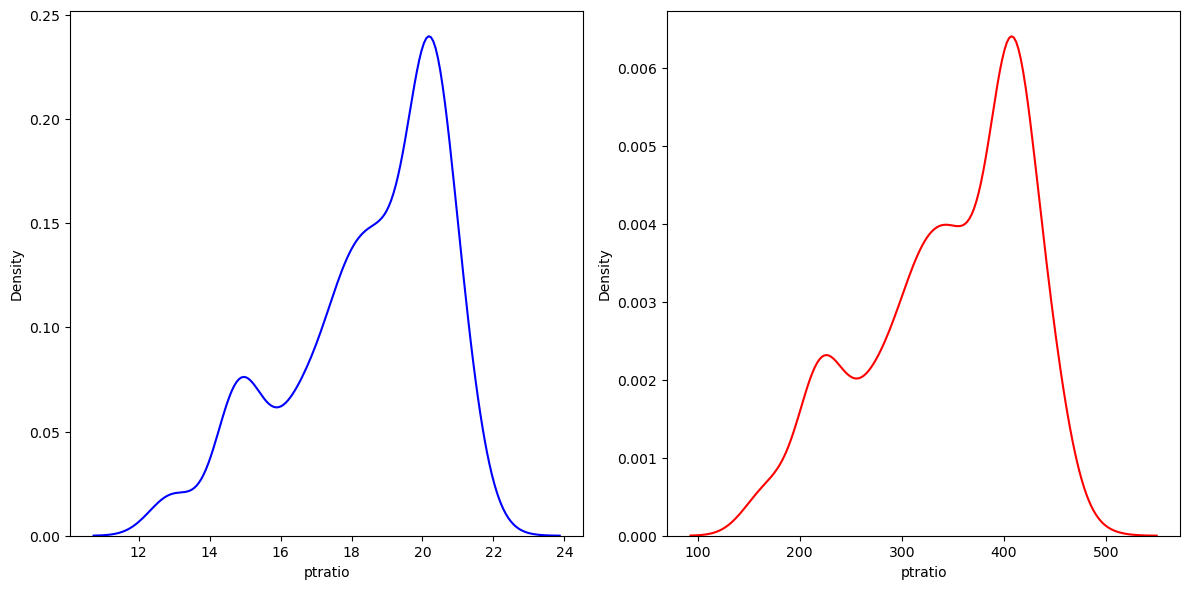

skew before reciprocal transform -0.7999445320367449
skew after reciprocal transform -0.6085086626298968


In [42]:
# square on ptratio

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['ptratio'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.square(df['ptratio']), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before reciprocal transform', skew(df['ptratio']))
print('skew after reciprocal transform', skew(np.square(df['ptratio'])))

In [43]:
-df['b']

0     -396.90
1     -396.90
2     -392.83
3     -394.63
4     -396.90
        ...  
501   -391.99
502   -396.90
503   -396.90
504   -393.45
505   -396.90
Name: b, Length: 506, dtype: float64

### Reversing Left skewed into Right skewed, shifting and then applying Log:

> __reversing by adding -ve sign to all values of column__


> __Adding max value to entire column__

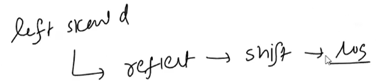

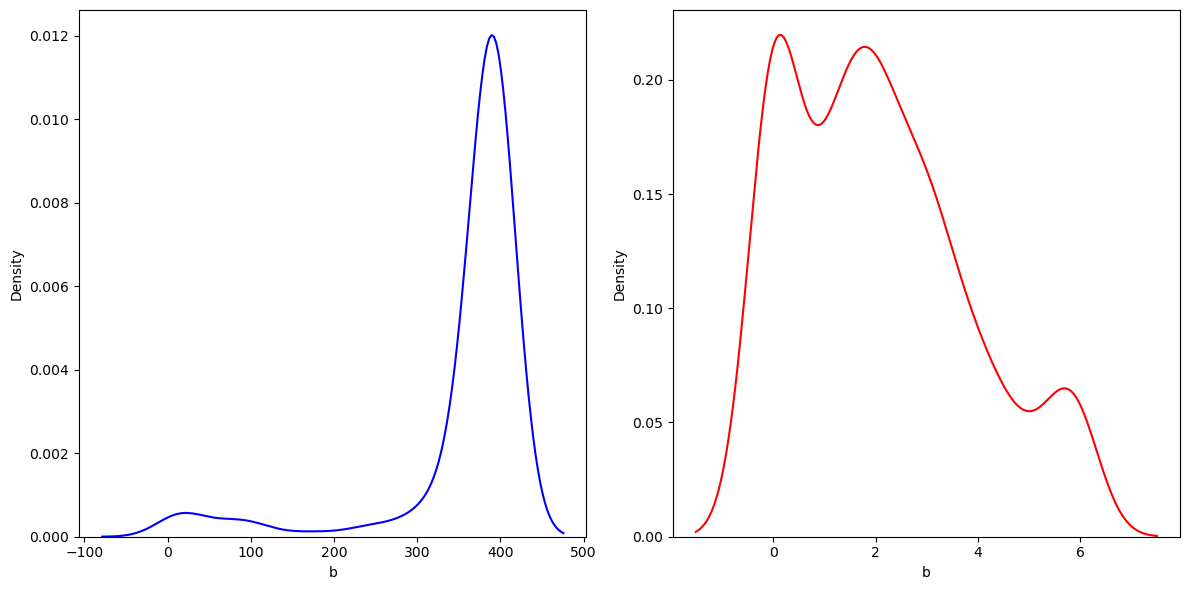

skew before reflect log transform -2.8817983452627716
skew after reflect log transform 0.5995750622214899


In [44]:
# reflect log on b

# Setting up the matplotlib figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the normal distribution
sns.kdeplot(df['b'], color='blue', ax=axs[0])

# Plotting the exponential distribution
sns.kdeplot(np.log1p(-df['b'] + 396.900000001), color='red', ax=axs[1])

plt.tight_layout()
plt.show()

from scipy.stats import skew

print('skew before reflect log transform', skew(df['b']))
print('skew after reflect log transform', skew(np.log1p(-df['b'] + 396.900000001)))

#### All transformations :

In [45]:
# log -> zn, chas, dis, rad
# sqrt -> indus, nox, rm, tax, lstat
# reciprocal -> crim
# square -> age, ptratio
# reflect shift log -> b

In [46]:
# baseline model

from sklearn.model_selection import train_test_split

# Define your features and target variable
X = df.drop('medv', axis=1)  # Features
y = df['medv']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [48]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = reg.predict(X_test)

print('r2 score', r2_score(y_test, y_pred))
print('mse', mean_squared_error(y_test, y_pred))

r2 score 0.6687594935356329
mse 24.291119474973446


In [49]:
def reflect_shift_log_transform(x):

    return np.log1p(-x + 396.900000001)

#### column transformer : 

In [50]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('log', FunctionTransformer(np.log1p), ['zn', 'chas', 'dis', 'rad']),
        ('sqrt', FunctionTransformer(np.sqrt), ['indus', 'nox', 'rm', 'tax', 'lstat']),
        ('reciprocal', FunctionTransformer(np.reciprocal), ['crim']),
        ('square', FunctionTransformer(np.square), ['age', 'ptratio']),
        ('reflect_shift_log', FunctionTransformer(reflect_shift_log_transform), ['b']),
    ],
    remainder='passthrough'  # Keeps columns not listed unchanged
)

In [51]:
X_train_trf = preprocessor.fit_transform(X_train)

In [52]:
X_test_trf = preprocessor.transform(X_test)

In [53]:
reg = LinearRegression()

reg.fit(X_train_trf, y_train)

LinearRegression()

In [54]:
y_pred = reg.predict(X_test_trf)

print('r2 score', r2_score(y_test, y_pred))
print('mse', mean_squared_error(y_test, y_pred))

r2 score 0.7219859878030808
mse 20.387819285980253


## 5. Box-Cox Transformer

- The Box-Cox transformation is a family of power transformations that are applied to data to
stabilize variance, make the data more normally distributed, or improve the skewness of both
the right and left skewed data.


- It's particularly useful when dealing with non-normal data that
violates assumptions of many statistical tests and models.

### NOTE : By this transformation we can convert any data (greater than 0) into Normally-distributed

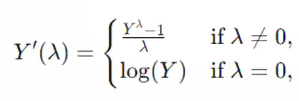

- This formula must be applied to each feature independently. Each feature may potentially have different values for λ.


- The exponent here is a variable called __lambda ($\lambda$) that varies over the range of -5 to 5__, and in the process of searching, we examine all values of $\lambda$


- Finally, we choose the __optimal value of $\lambda$ through Maximum Likelihood Estimation__ (resulting in the best approximation to a normal distribution) for your variable.


- Since the independent variable appears inside a logarithm, this transformation can be applied only to strictly positive features.


- we have a λ parameter that can be estimated using maximum likelihood. For example, we can try to minimize the skewness keeping the variance as stable as possible.





### NOTE : 

1. **First Apply transformation**


2. **Then scale the data**

### When to use:

1. Handle Skewness


2. Handle non-normal data


3. Heteroscedasticity


4. __Can act as general case to many other transformations (no need of headache)__

### When not to use:


1. __Negative values and zeros__


2. Interpretability is a concern


3. Data is already normally distributed


4. Categorical Data

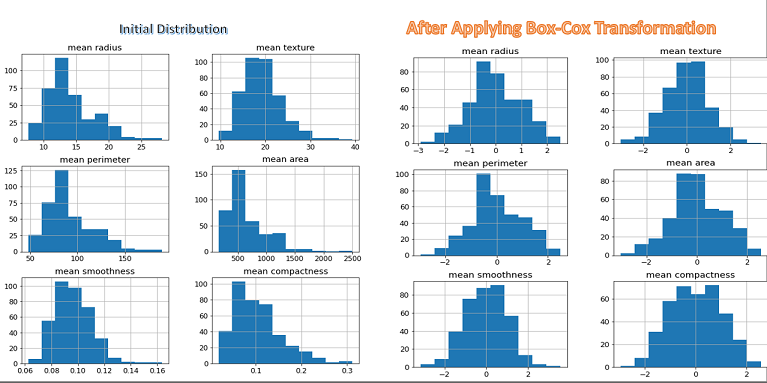

In [55]:
from sklearn.preprocessing import PowerTransformer

In [56]:
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

#### lambda values for each column : 

In [57]:
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

cols  box_cox_lambdas
0      crim        -0.114374
1        zn        -0.181510
2     indus         0.389192
3      chas        -1.008349
4       nox        -0.938023
5        rm         0.147907
6       age         1.362922
7       dis        -0.165778
8       rad        -0.134975
9       tax        -0.526450
10  ptratio         3.904696
11        b         3.622021
12    lstat         0.203126

In [58]:
reg = LinearRegression()

reg.fit(X_train_transformed, y_train)

LinearRegression()

In [59]:
y_pred = reg.predict(X_test_transformed)

print('r2 score', r2_score(y_test, y_pred))
print('mse', mean_squared_error(y_test, y_pred))

r2 score 0.7321931091068263
mse 19.63929246560026


### Before and after comparision for Box-Cox Plot

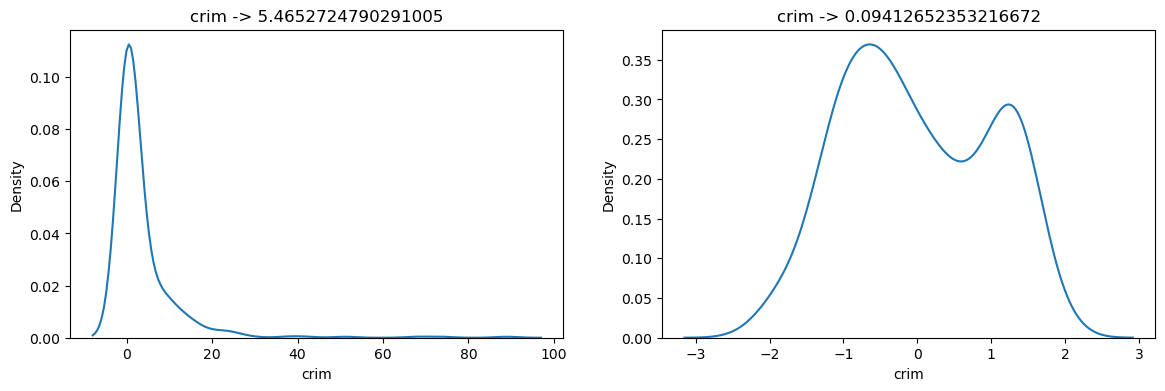

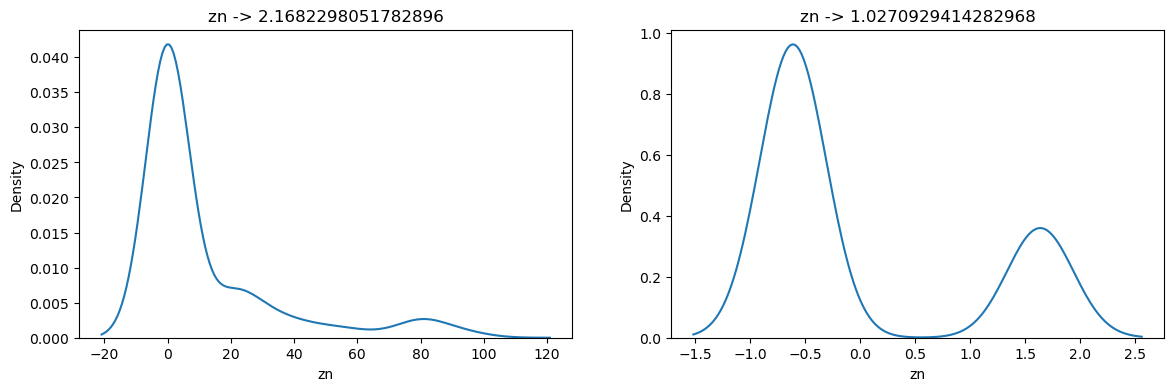

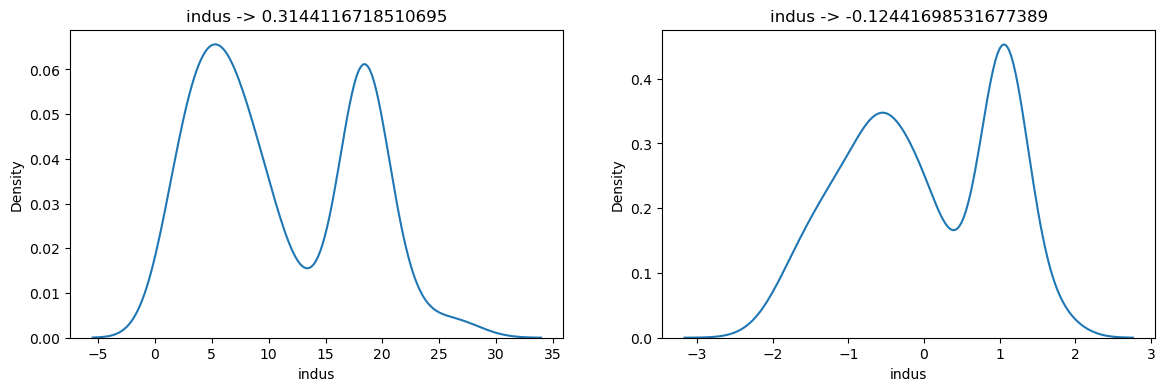

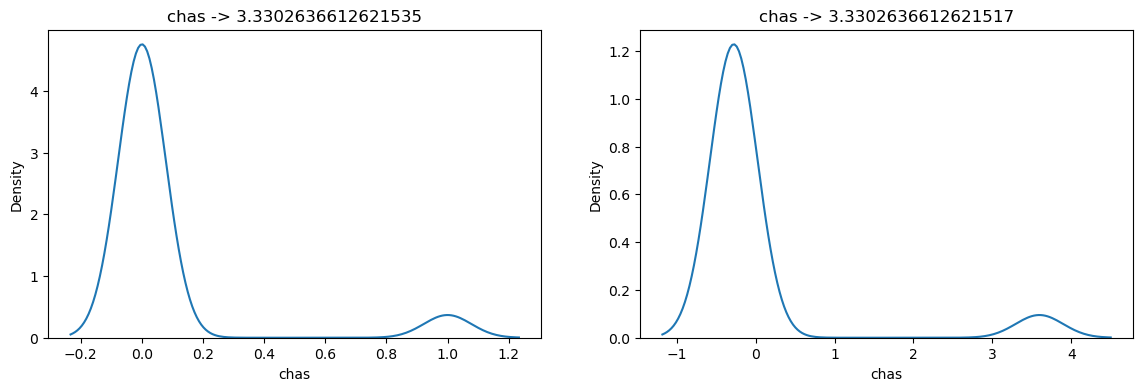

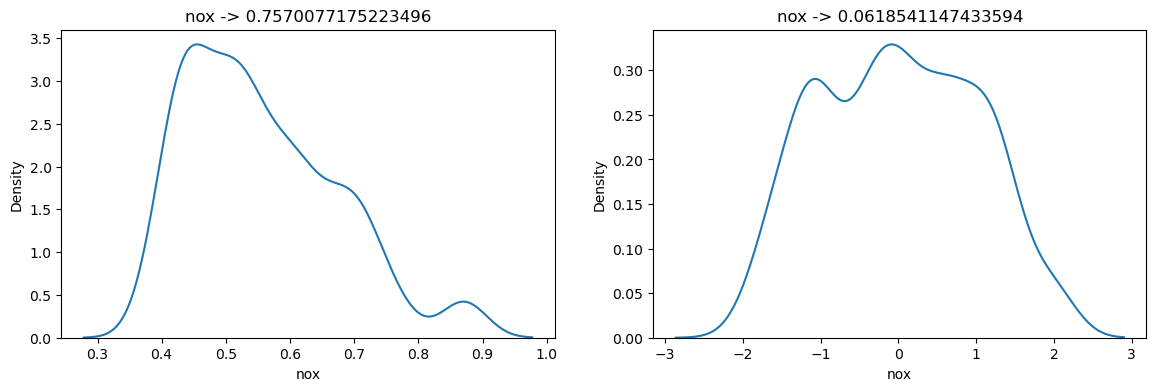

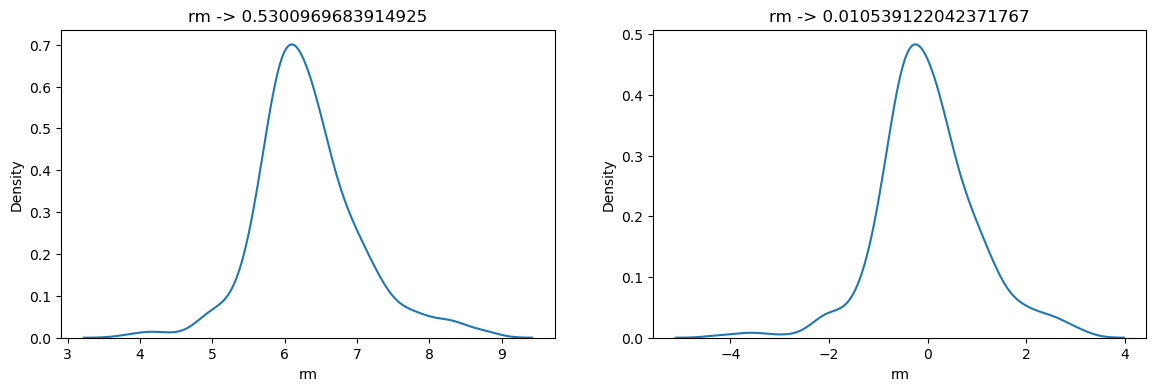

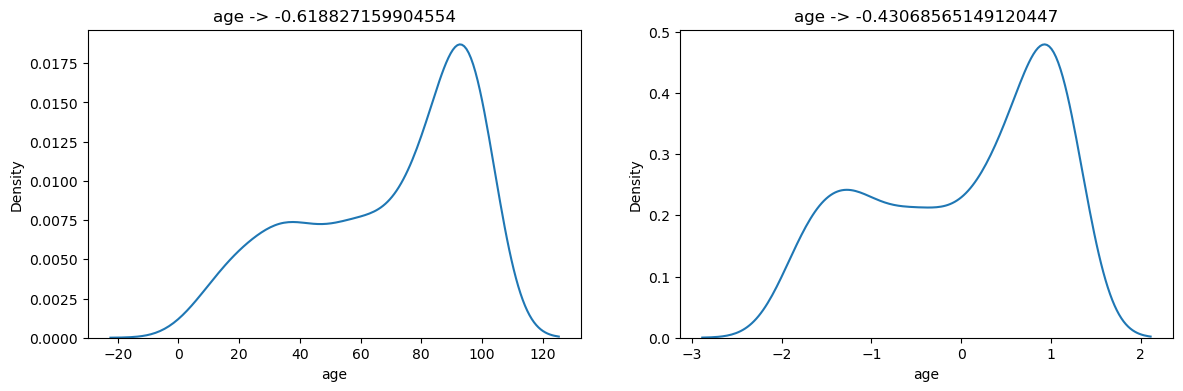

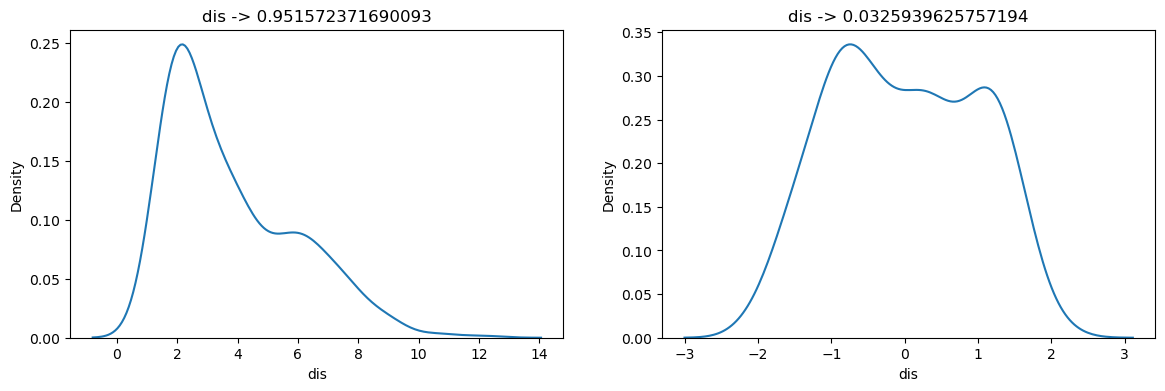

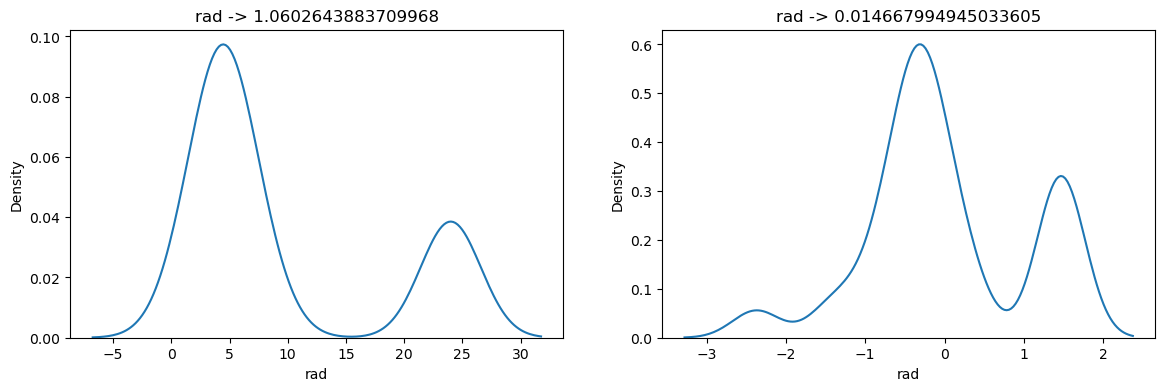

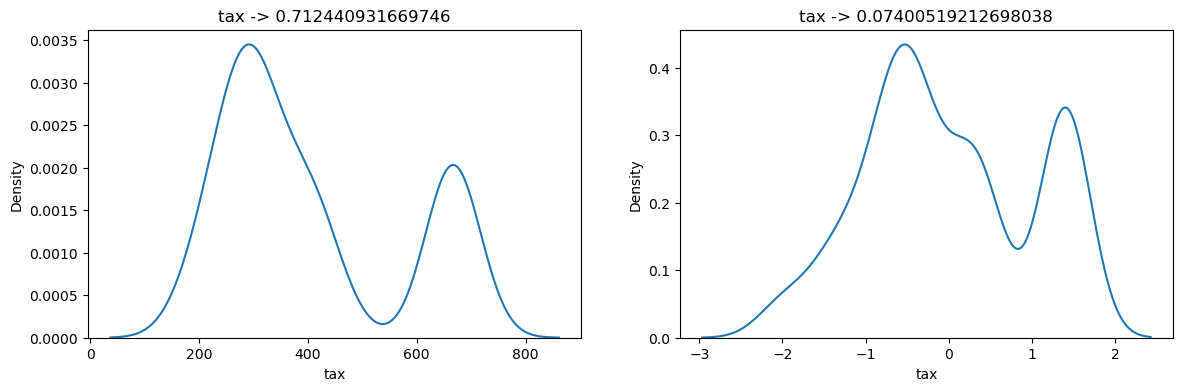

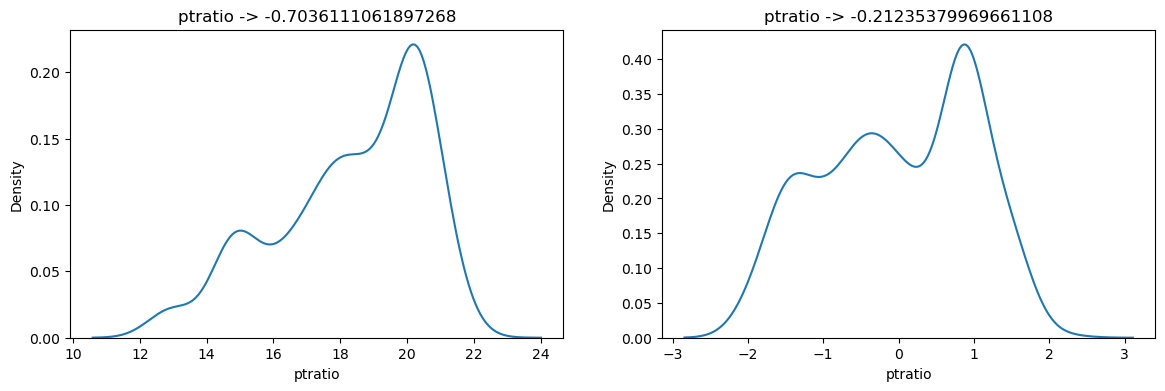

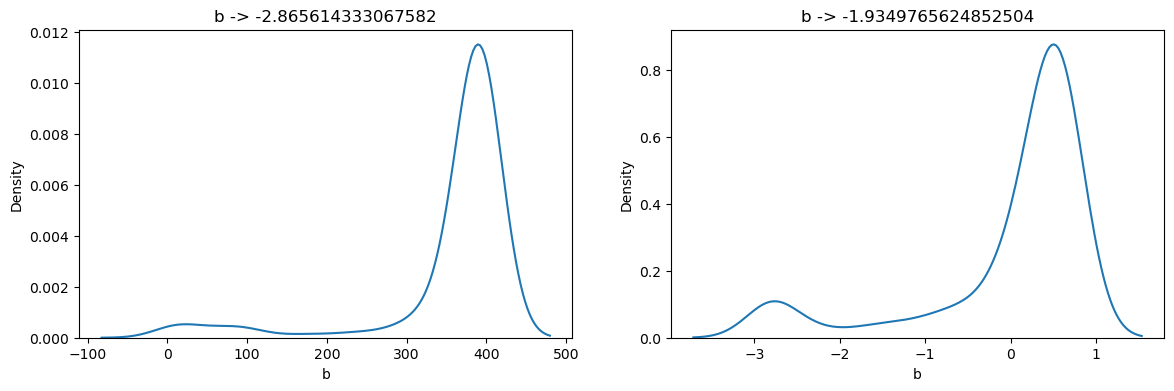

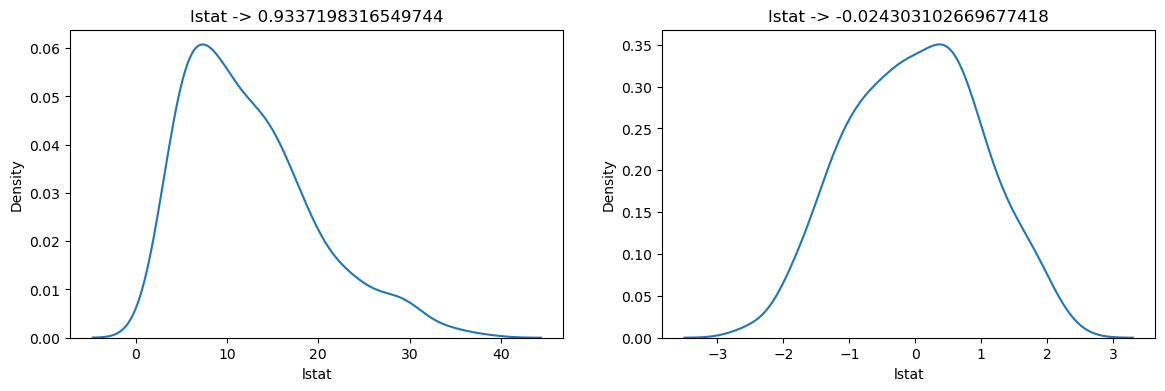

In [60]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    txt = col + " -> " + str(X_train[col].skew())
    plt.title(txt)

    plt.subplot(122)
    sns.kdeplot(X_train_transformed[col])
    txt1 = col + " -> " + str(X_train_transformed[col].skew())
    plt.title(txt1)

    plt.show()

## 6. Yeo-Johnson transformation

- The Yeo-Johnson transformation is a modification of the Box-Cox transformation, designed to __handle both positive and negative data.__


- While the Box-Cox transformation is only defined for
positive data, the Yeo-Johnson transformation extends its applicability to all real numbers,
making it more versatile in practical applications.



- The Yeo-Johnson transformation is defined as follows:

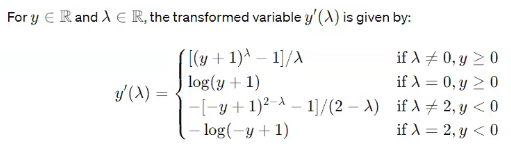

- The purpose of the Yeo-Johnson transformation is to stabilize the variance and make the data
more closely follow a normal distribution, which is a common assumption in many statistical
techniques and models. 


- This transformation is particularly useful when dealing with real-world
data that can contain both negative and positive values, ensuring that a wider range of
datasets can be normalized for analysis.



- Just like the Box-Cox transformation, the parameter is usually determined by maximizing the
log-likelihood function, which effectively finds the best that makes the data as normal as
possible after the transformation.

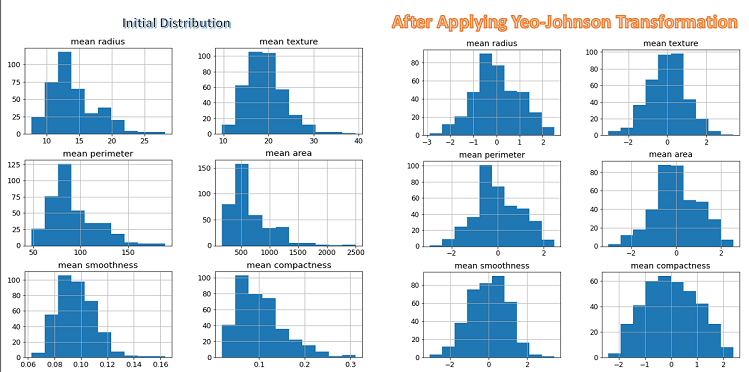

In [61]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.7314914113312388


cols  Yeo_Johnson_lambdas
0      crim            -0.958995
1        zn            -0.867045
2     indus             0.332416
3      chas           -20.097985
4       nox            -4.033137
5        rm            -0.014434
6       age             1.388267
7       dis            -0.459648
8       rad            -0.367935
9       tax            -0.530210
10  ptratio             4.088528
11        b             3.749049
12    lstat             0.123804

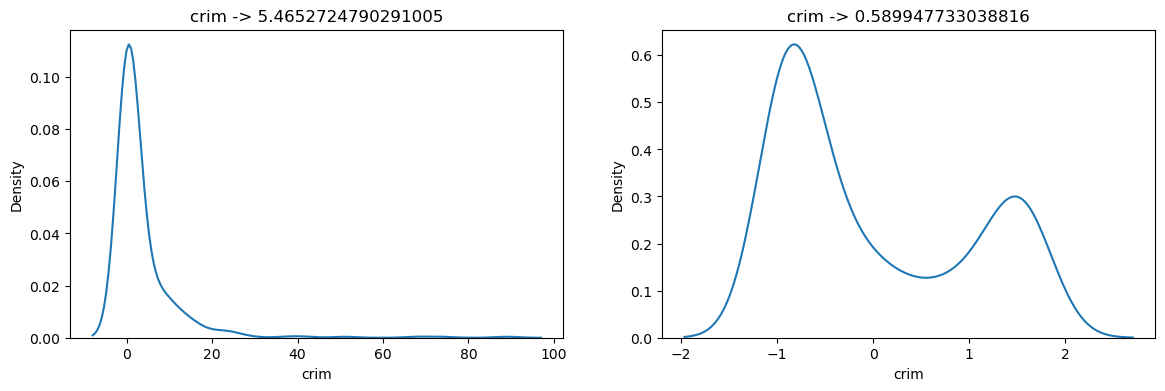

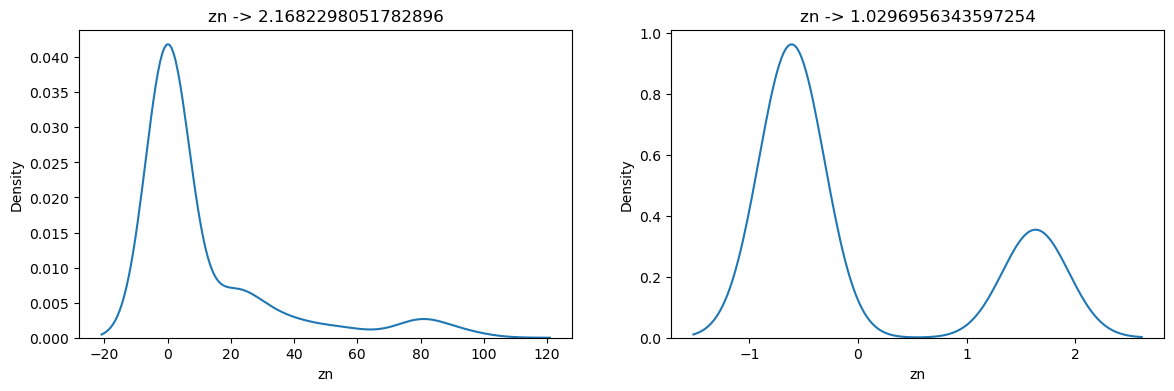

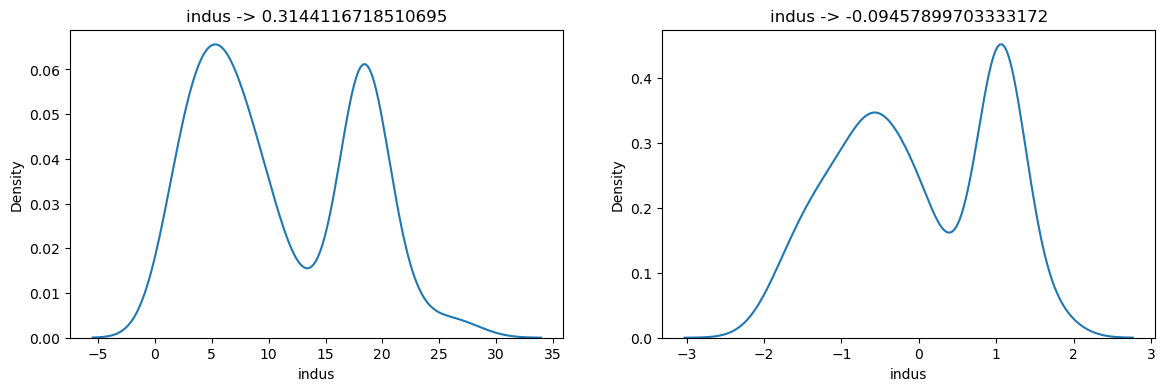

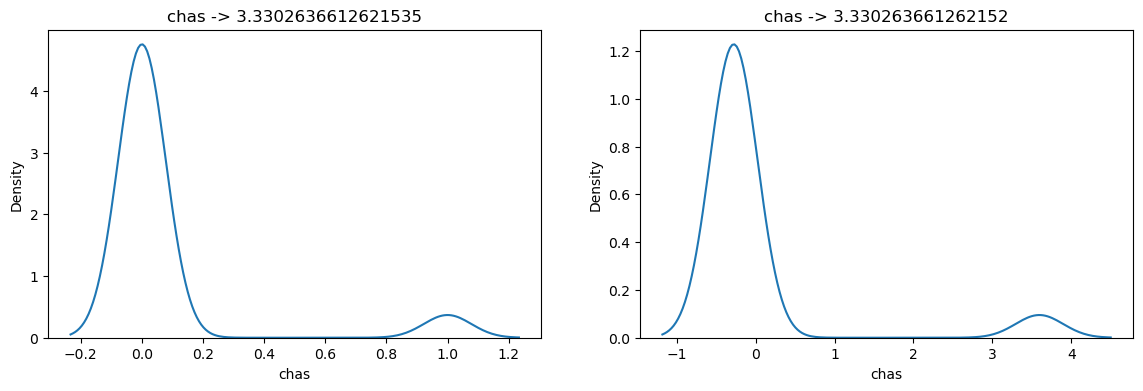

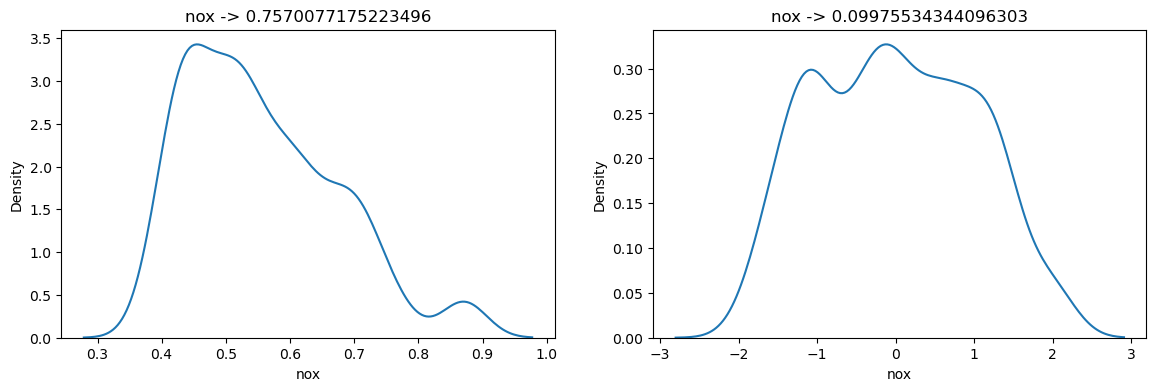

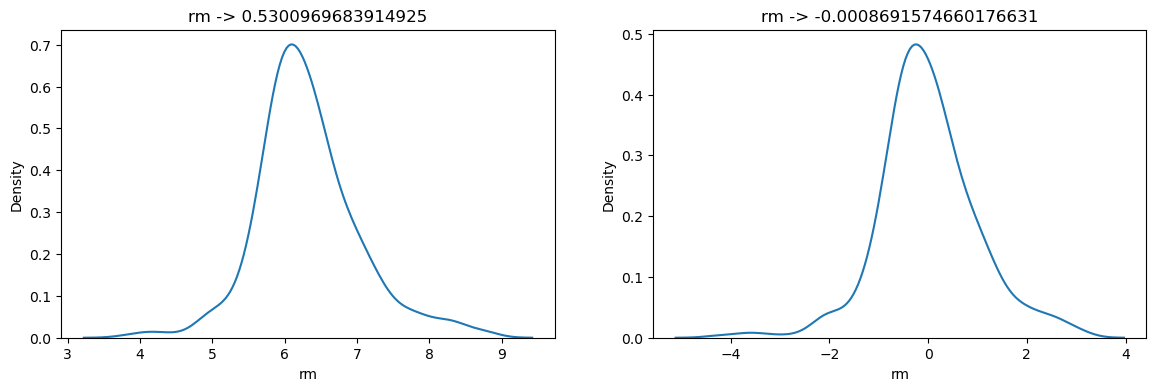

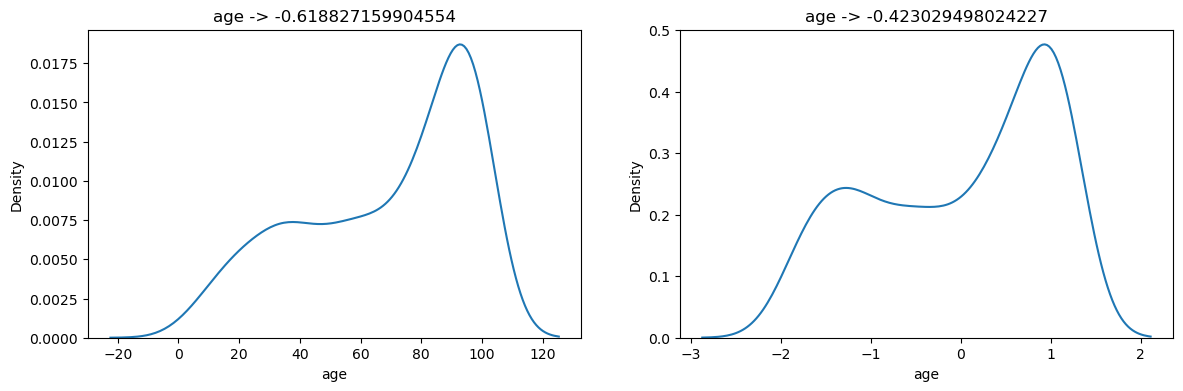

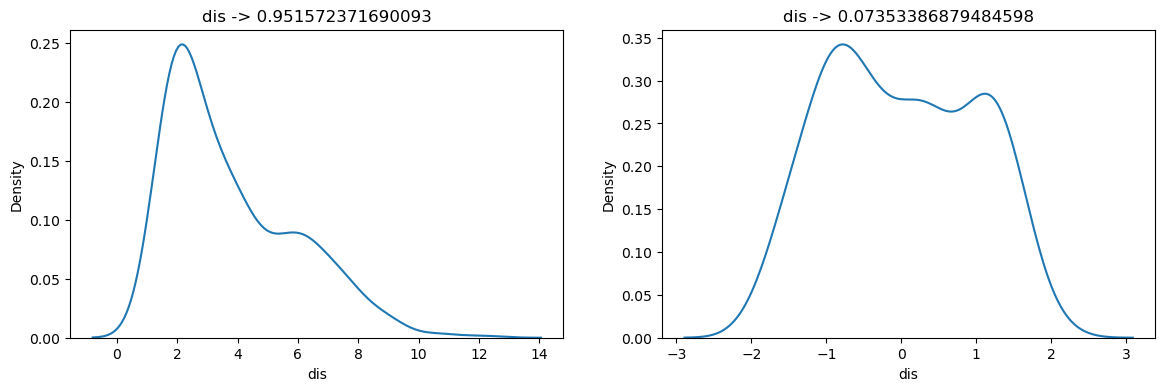

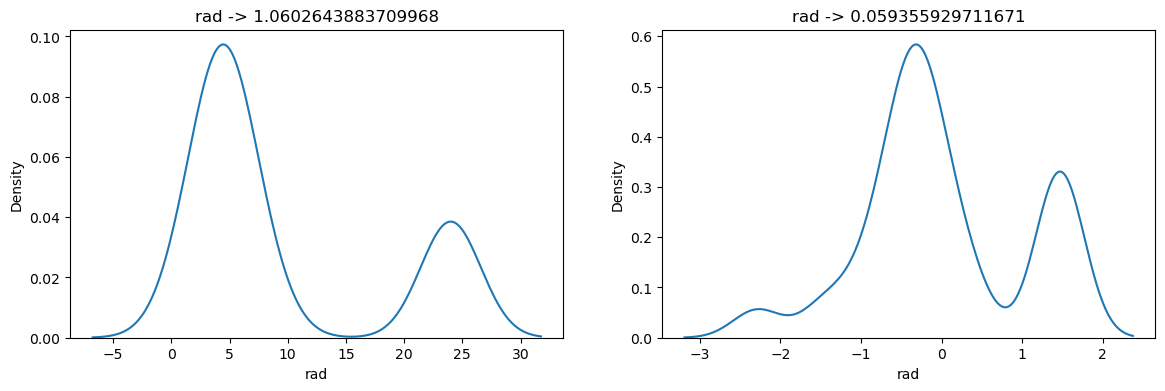

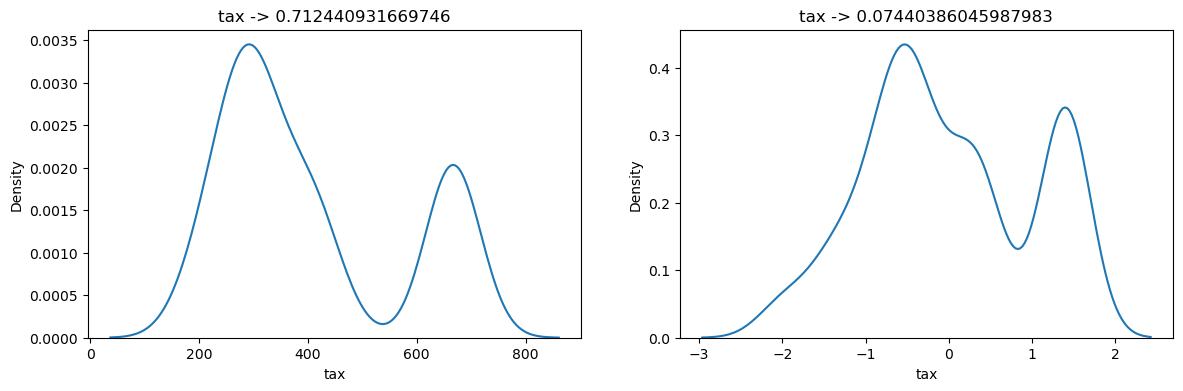

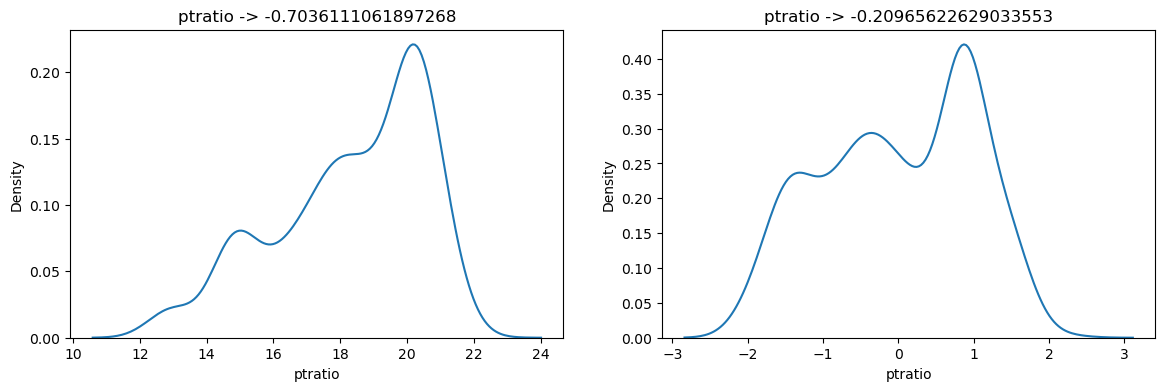

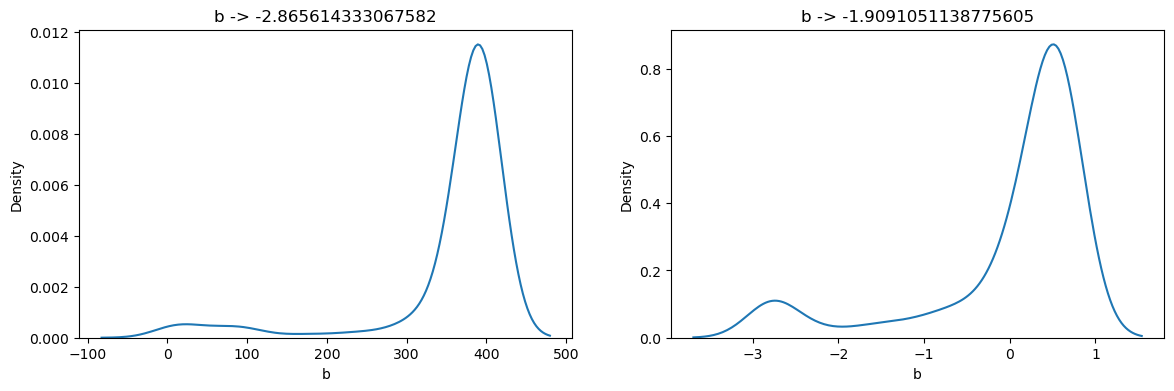

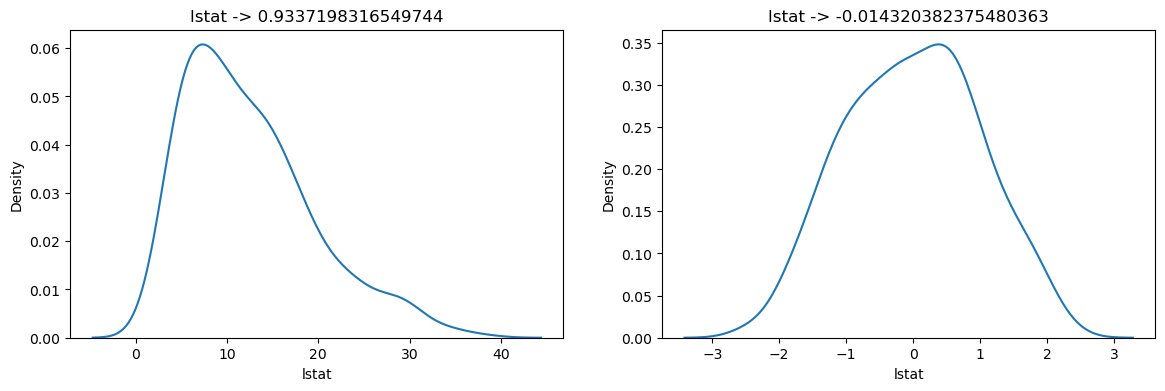

In [62]:
# Before and after comparision for Box-Cox Plot
X_train_transformed2 = pd.DataFrame(X_train_transformed2 ,columns=X_train.columns)

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    txt = col + " -> " + str(X_train[col].skew())
    plt.title(txt)

    plt.subplot(122)
    sns.kdeplot(X_train_transformed2[col])
    txt1 = col + " -> " + str(X_train_transformed2[col].skew())
    plt.title(txt1)

    plt.show()

In [63]:
# Side by side Lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

cols  box_cox_lambdas  Yeo_Johnson_lambdas
0      crim        -0.114374            -0.958995
1        zn        -0.181510            -0.867045
2     indus         0.389192             0.332416
3      chas        -1.008349           -20.097985
4       nox        -0.938023            -4.033137
5        rm         0.147907            -0.014434
6       age         1.362922             1.388267
7       dis        -0.165778            -0.459648
8       rad        -0.134975            -0.367935
9       tax        -0.526450            -0.530210
10  ptratio         3.904696             4.088528
11        b         3.622021             3.749049
12    lstat         0.203126             0.123804

---
---

In [64]:
import numpy as np
import pandas as pd

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.shape

(506, 14)

In [66]:
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [67]:
df.describe().T

count        mean         std        min         25%        50%  \
crim     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
zn       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
indus    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
chas     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
nox      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
rm       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
age      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
dis      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
rad      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
tax      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
ptratio  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
b        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
lstat    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
medv     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
crim       3.677083   88.9762  
zn        12.500000  100.0000  
indus     18.100000   27.7400  
chas       0.000000    1.0000  
nox        0.624000    0.8710  
rm         6.623500    8.7800  
age       94.075000  100.0000  
dis        5.188425   12.1265  
rad       24.000000   24.0000  
tax      666.000000  711.0000  
ptratio   20.200000   22.0000  
b        396.225000  396.9000  
lstat     16.955000   37.9700  
medv      25.000000   50.0000

In [68]:
df.var()

crim          73.986578
zn           543.936814
indus         47.064442
chas           0.064513
nox            0.013428
rm             0.493671
age          792.358399
dis            4.434015
rad           75.816366
tax        28404.759488
ptratio        4.686989
b           8334.752263
lstat         50.994760
medv          84.586724
dtype: float64

In [69]:
var_df = pd.DataFrame(df.skew()).reset_index()
var_df

index         0
0      crim  5.223149
1        zn  2.225666
2     indus  0.295022
3      chas  3.405904
4       nox  0.729308
5        rm  0.403612
6       age -0.598963
7       dis  1.011781
8       rad  1.004815
9       tax  0.669956
10  ptratio -0.802325
11        b -2.890374
12    lstat  0.906460
13     medv  1.108098

In [70]:
var_df.columns = ['col_name','skew']

In [71]:
var_df

col_name      skew
0      crim  5.223149
1        zn  2.225666
2     indus  0.295022
3      chas  3.405904
4       nox  0.729308
5        rm  0.403612
6       age -0.598963
7       dis  1.011781
8       rad  1.004815
9       tax  0.669956
10  ptratio -0.802325
11        b -2.890374
12    lstat  0.906460
13     medv  1.108098

In [72]:
def skew_value(x):
    
    if (x>0 and x<1):
        return 'right_mild'
    if (x>=1 and x<=4):
        return 'right_moderate'
    if x>4:
        return 'right_extreme'
    if (x<0 and x>-1):
        return 'left_mild'
    if (x<=-1 and x>=-4):
        return 'left_moderate'
    if x<-4:
        return 'left_extreme'
    else:
        return 'zero_skew'

In [73]:
skew_value(-5.6)

'left_extreme'

In [74]:
var_df['skew_name'] = var_df['skew'].apply(skew_value)

In [75]:
var_df

col_name      skew       skew_name
0      crim  5.223149   right_extreme
1        zn  2.225666  right_moderate
2     indus  0.295022      right_mild
3      chas  3.405904  right_moderate
4       nox  0.729308      right_mild
5        rm  0.403612      right_mild
6       age -0.598963       left_mild
7       dis  1.011781  right_moderate
8       rad  1.004815  right_moderate
9       tax  0.669956      right_mild
10  ptratio -0.802325       left_mild
11        b -2.890374   left_moderate
12    lstat  0.906460      right_mild
13     medv  1.108098  right_moderate

In [76]:
from sklearn.preprocessing import PowerTransformer

In [77]:
box_cox = PowerTransformer(method='box-cox')

In [78]:
X_boxcox = box_cox.fit_transform(df+0.000001)
X_boxcox

array([[-2.49541488,  1.65478215, -1.53363599, ...,  0.62748016,
        -1.25138907,  0.31539782],
       [-1.45471892, -0.6001709 , -0.43288943, ...,  0.62748016,
        -0.33020687,  0.05034203],
       [-1.45519783, -0.6001709 , -0.43288943, ...,  0.49985469,
        -1.54369134,  1.29200603],
       ...,
       [-0.95501145, -0.6001709 ,  0.29559962, ...,  0.62748016,
        -1.07282576,  0.30477831],
       [-0.61444947, -0.6001709 ,  0.29559962, ...,  0.51907063,
        -0.86756219,  0.09606907],
       [-1.10521968, -0.6001709 ,  0.29559962, ...,  0.62748016,
        -0.56712563, -1.34061118]])

In [79]:
var_df['after_boxcox']=pd.DataFrame(X_boxcox).skew()
var_df

col_name      skew       skew_name  after_boxcox
0      crim  5.223149   right_extreme      0.093655
1        zn  2.225666  right_moderate      1.069256
2     indus  0.295022      right_mild     -0.133737
3      chas  3.405904  right_moderate      3.405904
4       nox  0.729308      right_mild      0.060947
5        rm  0.403612      right_mild      0.037051
6       age -0.598963       left_mild     -0.425141
7       dis  1.011781  right_moderate      0.028653
8       rad  1.004815  right_moderate      0.017430
9       tax  0.669956      right_mild      0.079204
10  ptratio -0.802325       left_mild     -0.222924
11        b -2.890374   left_moderate     -1.931634
12    lstat  0.906460      right_mild     -0.027886
13     medv  1.108098  right_moderate      0.015882

In [80]:
var_df['boxcox_lambdas'] = box_cox.lambdas_

In [81]:
yeo = PowerTransformer()

In [82]:
X_yeojohnson = yeo.fit_transform(df)
X_yeojohnson

array([[-1.05615089,  1.60526992, -1.52377643, ...,  0.63275672,
        -1.25709923,  0.31759771],
       [-0.99990077, -0.59995411, -0.44393776, ...,  0.63275672,
        -0.33442163,  0.05176363],
       [-0.9999533 , -0.59995411, -0.44393776, ...,  0.50206489,
        -1.54345266,  1.29338867],
       ...,
       [-0.91475707, -0.59995411,  0.29306121, ...,  0.63275672,
        -1.08007767,  0.30695345],
       [-0.79947765, -0.59995411,  0.29306121, ...,  0.52173322,
        -0.87516238,  0.09764712],
       [-0.94810109, -0.59995411,  0.29306121, ...,  0.63275672,
        -0.57335234, -1.34478102]])

In [83]:
var_df['after_yeohohnson']=pd.DataFrame(X_yeojohnson).skew()
var_df

col_name      skew       skew_name  after_boxcox  boxcox_lambdas  \
0      crim  5.223149   right_extreme      0.093655       -0.113540   
1        zn  2.225666  right_moderate      1.069256       -0.189624   
2     indus  0.295022      right_mild     -0.133737        0.432090   
3      chas  3.405904  right_moderate      3.405904       -1.046435   
4       nox  0.729308      right_mild      0.060947       -0.915615   
5        rm  0.403612      right_mild      0.037051        0.448960   
6       age -0.598963       left_mild     -0.425141        1.341447   
7       dis  1.011781  right_moderate      0.028653       -0.155606   
8       rad  1.004815  right_moderate      0.017430       -0.141409   
9       tax  0.669956      right_mild      0.079204       -0.525509   
10  ptratio -0.802325       left_mild     -0.222924        4.350216   
11        b -2.890374   left_moderate     -1.931634        3.663673   
12    lstat  0.906460      right_mild     -0.027886        0.227767   
13     medv  1.108098  right_moderate      0.015882        0.216621   

    after_yeohohnson  
0           0.595482  
1           1.071695  
2          -0.104641  
3           3.405904  
4           0.098431  
5           0.023275  
6          -0.417736  
7           0.067176  
8           0.065818  
9           0.079613  
10         -0.220097  
11         -1.908672  
12         -0.017928  
13          0.011211

In [84]:
X_yeojohnson = yeo.fit_transform(df+0.000001)
X_yeojohnson

array([[-1.05615075,  1.6052699 , -1.52377642, ...,  0.63275671,
        -1.25709923,  0.3175977 ],
       [-0.99990067, -0.59995411, -0.44393776, ...,  0.63275671,
        -0.33442162,  0.05176362],
       [-0.99995319, -0.59995411, -0.44393776, ...,  0.50206489,
        -1.54345267,  1.29338868],
       ...,
       [-0.91475701, -0.59995411,  0.29306121, ...,  0.63275671,
        -1.08007768,  0.30695344],
       [-0.79947764, -0.59995411,  0.29306121, ...,  0.52173322,
        -0.87516238,  0.09764711],
       [-0.948101  , -0.59995411,  0.29306121, ...,  0.63275671,
        -0.57335234, -1.34478101]])

In [85]:
var_df['yeojohnson_lambdas'] = yeo.lambdas_

In [86]:
var_df['new_yeohohnson']=pd.DataFrame(X_yeojohnson).skew()

In [87]:
var_df['new_yeojohnson_lambdas'] = yeo.lambdas_

In [88]:
var_df

col_name      skew       skew_name  after_boxcox  boxcox_lambdas  \
0      crim  5.223149   right_extreme      0.093655       -0.113540   
1        zn  2.225666  right_moderate      1.069256       -0.189624   
2     indus  0.295022      right_mild     -0.133737        0.432090   
3      chas  3.405904  right_moderate      3.405904       -1.046435   
4       nox  0.729308      right_mild      0.060947       -0.915615   
5        rm  0.403612      right_mild      0.037051        0.448960   
6       age -0.598963       left_mild     -0.425141        1.341447   
7       dis  1.011781  right_moderate      0.028653       -0.155606   
8       rad  1.004815  right_moderate      0.017430       -0.141409   
9       tax  0.669956      right_mild      0.079204       -0.525509   
10  ptratio -0.802325       left_mild     -0.222924        4.350216   
11        b -2.890374   left_moderate     -1.931634        3.663673   
12    lstat  0.906460      right_mild     -0.027886        0.227767   
13     medv  1.108098  right_moderate      0.015882        0.216621   

    after_yeohohnson  yeojohnson_lambdas  new_yeohohnson  \
0           0.595482           -0.953898        0.595482   
1           1.071695           -0.905298        1.071695   
2          -0.104641            0.379152       -0.104641   
3           3.405904          -20.857104        3.405904   
4           0.098431           -3.973714        0.098431   
5           0.023275            0.332986        0.023275   
6          -0.417736            1.366140       -0.417736   
7           0.067176           -0.448872        0.067176   
8           0.065818           -0.373679        0.065818   
9           0.079613           -0.529176        0.079614   
10         -0.220097            4.557704       -0.220097   
11         -1.908672            3.778134       -1.908672   
12         -0.017928            0.153705       -0.017928   
13          0.011211            0.170250        0.011211   

    new_yeojohnson_lambdas  
0                -0.953898  
1                -0.905298  
2                 0.379152  
3               -20.857104  
4                -3.973714  
5                 0.332986  
6                 1.366140  
7                -0.448872  
8                -0.373679  
9                -0.529176  
10                4.557704  
11                3.778134  
12                0.153705  
13                0.170250

In [89]:
df['chas'].describe()

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: chas, dtype: float64

In [90]:
df['chas']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: chas, Length: 506, dtype: int64